# Overview

This is such a fun dataset for exploration! It has images, it has product details, and it has transaction history. I made this visualization snippet to get more familiar with the collection of articles / items from H&M, as well as get a feel of what the products are and perhaps a glance on customer profile.

Big thanks to the following notebook(s) that gave a lot of ideas and implementation steps for the snippets:
- https://www.kaggle.com/vanguarde/h-m-eda-first-look

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import plotly.express as px
import matplotlib.image as mpimg

import warnings 
warnings.filterwarnings('ignore')

# Overview of Data

In [2]:
articles = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/articles.csv")
customers = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/customers.csv")
transactions = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")

In [3]:
print(articles.columns)
articles.head()

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')


article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  ...  \
0                     Solid                  9             Black  ...   
1                     Solid                 10             White  ...   
2                    Stripe                 11         Off White  ...   
3                     Solid                  9             Black  ...   
4                     Solid                 10             White  ...   

   department_name index_code        index_name index_group_no  \
0     Jersey Basic          A        Ladieswear              1   
1     Jersey Basic          A        Ladieswear              1   
2     Jersey Basic          A        Ladieswear              1   
3   Clean Lingerie          B  Lingeries/Tights              1   
4   Clean Lingerie          B  Lingeries/Tights              1   

   index_group_name section_no            section_name garment_group_no  \
0        Ladieswear         16  Womens Everyday Basics             1002   
1        Ladieswear         16  Womens Everyday Basics             1002   
2        Ladieswear         16  Womens Everyday Basics             1002   
3        Ladieswear         61         Womens Lingerie             1017   
4        Ladieswear         61         Womens Lingerie             1017   

   garment_group_name                                        detail_desc  
0        Jersey Basic            Jersey top with narrow shoulder straps.  
1        Jersey Basic            Jersey top with narrow shoulder straps.  
2        Jersey Basic            Jersey top with narrow shoulder straps.  
3   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  
4   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  

[5 rows x 25 columns]

In [4]:
print(customers.columns)
customers.head()

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')


customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  NaN     NaN   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  NaN     NaN   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  NaN     NaN   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  NaN     NaN   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   NONE  49.0   
1             ACTIVE                   NONE  25.0   
2             ACTIVE                   NONE  24.0   
3             ACTIVE                   NONE  54.0   
4             ACTIVE              Regularly  52.0   

                                         postal_code  
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...  
2  64f17e6a330a85798e4998f62d0930d14db8db1c054af6...  
3  5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...  
4  25fa5ddee9aac01b35208d01736e57942317d756b32ddd...

In [5]:
print(transactions.columns)
transactions.head()

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')


t_dat                                        customer_id  article_id  \
0  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   
2  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004   
3  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003   
4  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004   

      price  sales_channel_id  
0  0.050831                 2  
1  0.030492                 2  
2  0.015237                 2  
3  0.016932                 2  
4  0.016932                 2

In [6]:
N_SAMPLE = 1000000
transactionsSample = transactions.sample(n=N_SAMPLE)

In [7]:
article_volume = transactionsSample.groupby('article_id')['t_dat'].count().sort_values(ascending=False).reset_index()
article_volume.columns = ['article_id','volume']
article_volume.head()

article_id  volume
0   706016001    1552
1   706016002    1077
2   372860001    1055
3   610776002     993
4   759871002     831

In [8]:
articles_withVolume = pd.merge(articles,article_volume,on=['article_id'],how='left')
articles_withVolume.head(2)

article_id  product_code  prod_name  product_type_no product_type_name  \
0   108775015        108775  Strap top              253          Vest top   
1   108775044        108775  Strap top              253          Vest top   

   product_group_name  graphical_appearance_no graphical_appearance_name  \
0  Garment Upper body                  1010016                     Solid   
1  Garment Upper body                  1010016                     Solid   

   colour_group_code colour_group_name  ...  index_code  index_name  \
0                  9             Black  ...           A  Ladieswear   
1                 10             White  ...           A  Ladieswear   

   index_group_no index_group_name  section_no            section_name  \
0               1       Ladieswear          16  Womens Everyday Basics   
1               1       Ladieswear          16  Womens Everyday Basics   

  garment_group_no garment_group_name  \
0             1002       Jersey Basic   
1             1002       Jersey Basic   

                               detail_desc volume  
0  Jersey top with narrow shoulder straps.  329.0  
1  Jersey top with narrow shoulder straps.  209.0  

[2 rows x 26 columns]

# Treemap to get better feel of different product categories and how large they are
Comparing treemap based on # articles and sales volume

In [9]:
articles['ones'] = 1.0  # to count number of rows
px.treemap(articles, path=['index_group_name','index_name','product_group_name', 'product_type_name'],
                values='ones', title='Tree Map based on Article ID')
# fig.show()

In [10]:
fig = px.treemap(articles_withVolume, path=['index_group_name','index_name','product_group_name', 'product_type_name'],
                values='volume', title='Tree Map based on Sales Volume')
fig.show()

In [11]:
fig = px.treemap(articles_withVolume, path=['index_group_name','section_name','product_group_name', 'product_type_name'],
                values='volume', title='Tree Map based on Sales Volume')
fig.show()

# Functions

### Function: Given an article_id, get the volume and price history (weekly)

In [12]:
def getArticlePriceHistory(article_id):
    dfTrxArticle = transactions[transactions.article_id == article_id]
    dfTrxArticle['priceK'] = dfTrxArticle.price * 1000
    dfTrxArticle['t_dat'] = pd.to_datetime(dfTrxArticle['t_dat'])
    series_mean = dfTrxArticle[['t_dat', 'priceK']].groupby(pd.Grouper(key="t_dat", freq='W')).mean()
    series_stdev = dfTrxArticle[['t_dat', 'priceK']].groupby(pd.Grouper(key="t_dat", freq='W')).std().fillna(0)
    series_volume = dfTrxArticle[['t_dat', 'priceK']].groupby(pd.Grouper(key="t_dat", freq='W')).count().fillna(0)
    dfArticlePriceHistory = pd.DataFrame({'price_avg':series_mean['priceK'],'price_std':series_stdev['priceK'],'volume':series_volume['priceK']},index=series_volume.index)
    dfArticlePriceHistory['lower'] = dfArticlePriceHistory.price_avg - 2 * dfArticlePriceHistory.price_std
    dfArticlePriceHistory['upper'] = dfArticlePriceHistory.price_avg + 2 * dfArticlePriceHistory.price_std
    return dfArticlePriceHistory

### Function: Given an article_id, get the img object

In [13]:
def getImgFromArticle(article_id):
    subfolder = '0'+str(article_id)[:2]
    filename = '0'+str(article_id)+'.jpg'
    filename_root = '../input/h-and-m-personalized-fashion-recommendations/images/'
    filename_path = filename_root + subfolder + '/' + filename
    img = mpimg.imread(filename_path)
    return img

### Function: Get the article info as dictionary for an article_id

In [14]:
def getArticleInfo(article_id):
    dictArticleInfo = articles[articles.article_id==article_id].reset_index().iloc[0].to_dict()
    return dictArticleInfo

### Function: Visualize one set of info group for an article_id

In [15]:
def visualizeRowArticle(article_id):
    fig, axes = plt.subplots(1,2,figsize=(15,5))
    try:
        imgSample = getImgFromArticle(article_id)
        axes[0].imshow(imgSample)
        axes[0].set_title('Product Image')
    except:
        axes[0].set_title('Product Image is Missing')
    dfArticlePriceHistory = getArticlePriceHistory(article_id)
    dictArticleInfo = getArticleInfo(article_id)   
    axes[1].plot(dfArticlePriceHistory.price_avg, color='red', label='Prices')
    axes[1].fill_between(dfArticlePriceHistory.index, dfArticlePriceHistory.lower, dfArticlePriceHistory.upper, color='grey',alpha=0.1)
    axes[1].set_ylabel('Price')
    axes[1].legend(loc=2) # upper left
    ax1_twin = axes[1].twinx()
    ax1_twin.bar(x=dfArticlePriceHistory.index,height=dfArticlePriceHistory.volume, color='blue', label='Volume')
    ax1_twin.set_ylabel('Volume')        
    ax1_twin.legend(loc=1) # upper right
    axes[1].set_title('Historical Price Chart')
    plt.suptitle(dictArticleInfo['prod_name'] + ':\n' + dictArticleInfo['detail_desc'],horizontalalignment='left',x=0.1, y=1.05)

# Function: Divider title between sections of plotting

In [16]:
def createDividerTitle(title='Chart',color='mistyrose'):
    fig,axes = plt.subplots(figsize=(20,1), facecolor=color)
    axes.axis('off')
    plt.text(0.01,0.5,title,dict(size=20))

# Run functions to explore a couple of products (articles)

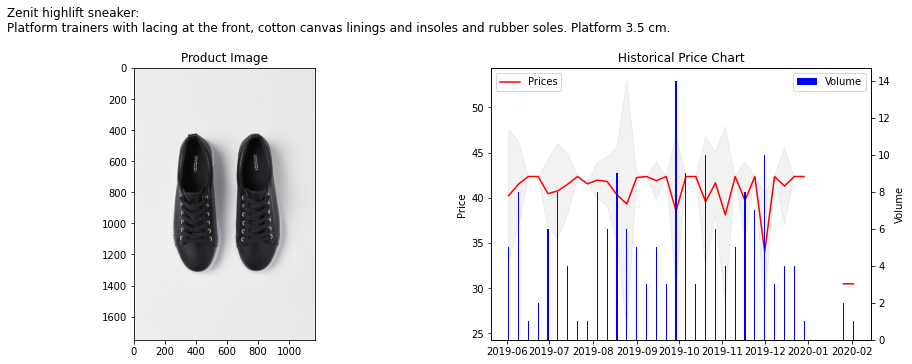

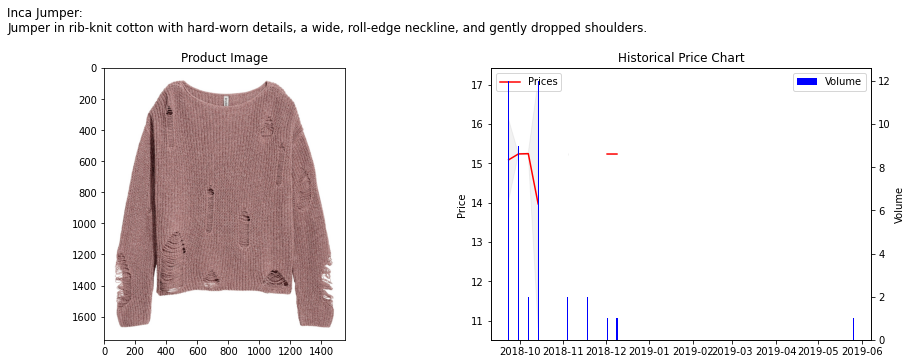

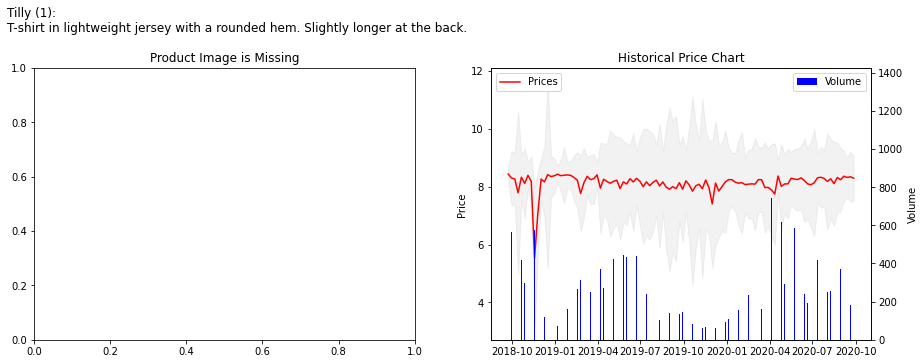

In [17]:
listArticle = [736489010,505221004,610776002]
for article_id in listArticle:
    visualizeRowArticle(article_id)

## Visualize top selling articles per year

In [18]:
transactionsSample = transactions.sample(n=100000)
transactionsSample['t_dat'] = pd.to_datetime(transactionsSample['t_dat']) 
transactionsSample['year'] = pd.DatetimeIndex(transactionsSample['t_dat']).year
transactionsSample.head()

t_dat                                        customer_id  \
28040372 2020-06-25  a493527d8d7ff096cf43bf8a973560a40eac514bd15854...   
10111039 2019-05-11  80da9867410a665fd524198ab59454278cc271ed0b79ee...   
17104844 2019-09-28  26cd9a2608102d3489ce567ae8dc22c8190f592be67ba1...   
15611061 2019-08-17  fb6abeffbd3aff80e099329d286693734ef2332aaeba2e...   
1202890  2018-10-15  875ef5a2a9f848eebd1dccb7a7c606a0738a4d73b7f458...   

          article_id     price  sales_channel_id  year  
28040372   836551001  0.008458                 1  2020  
10111039   721744007  0.024678                 2  2019  
17104844   733098009  0.013542                 2  2019  
15611061   740922001  0.025407                 1  2019  
1202890    578860001  0.010153                 2  2018

In [19]:
groupedTrx = transactionsSample.groupby(['year','article_id'])['customer_id'].count().reset_index()
groupedTrx.columns = ['year','article_id','count']

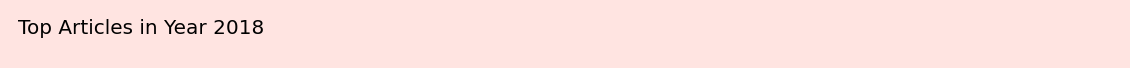

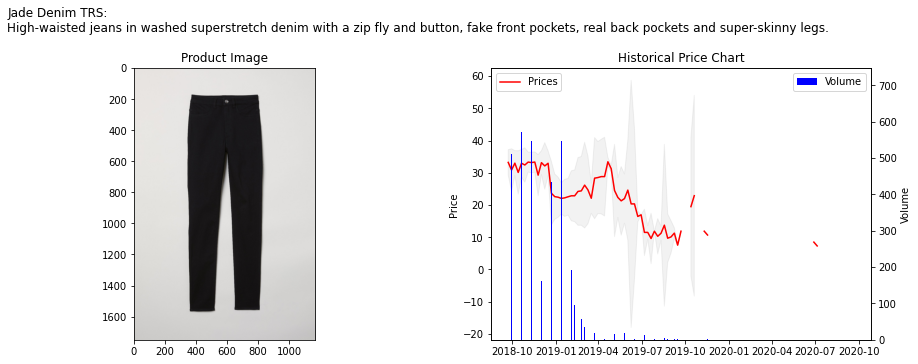

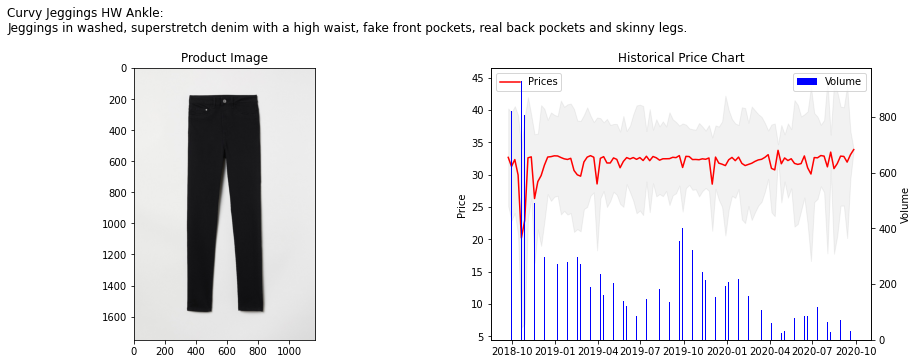

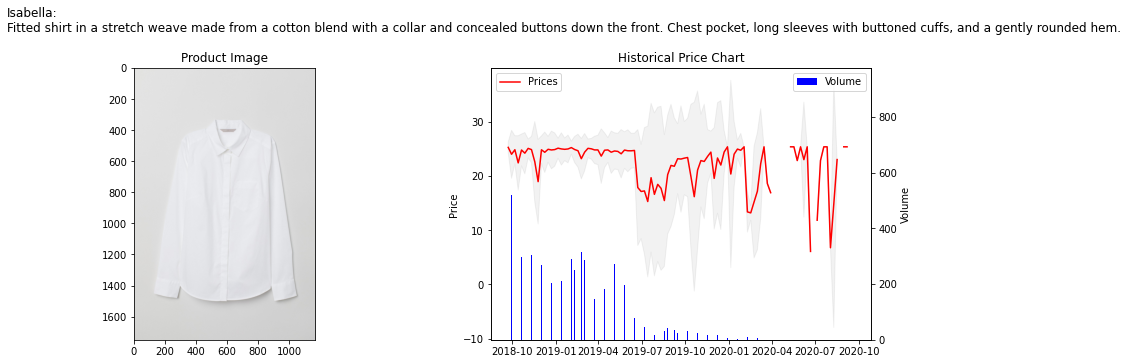

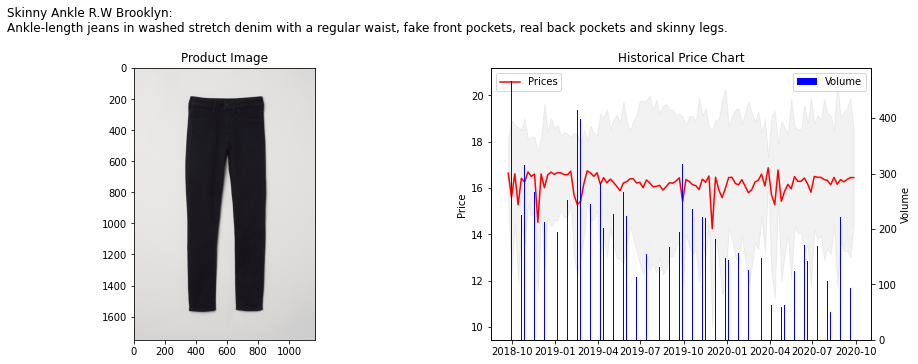

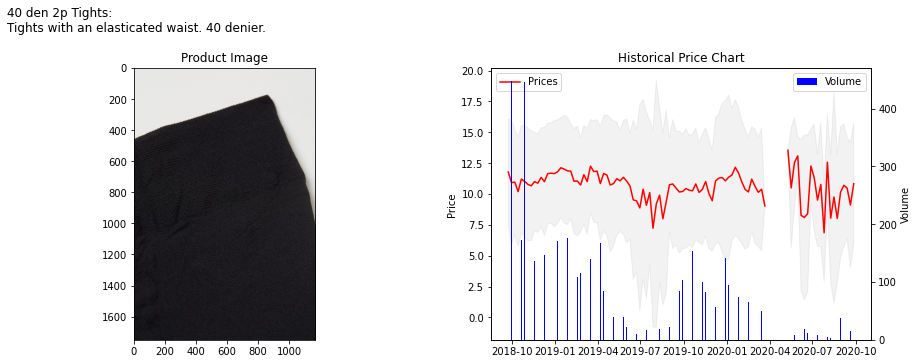

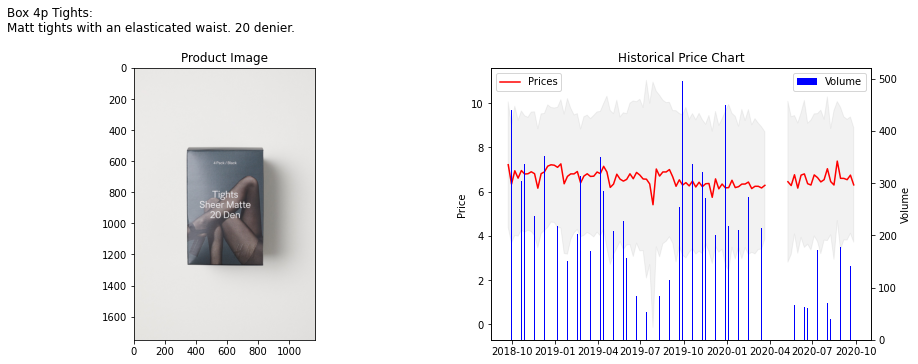

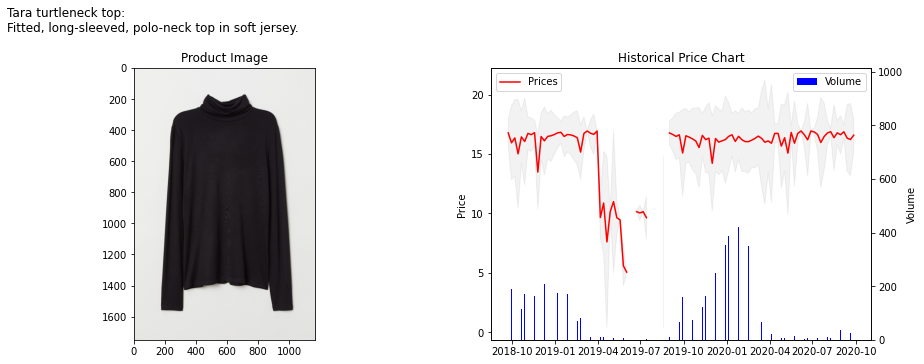

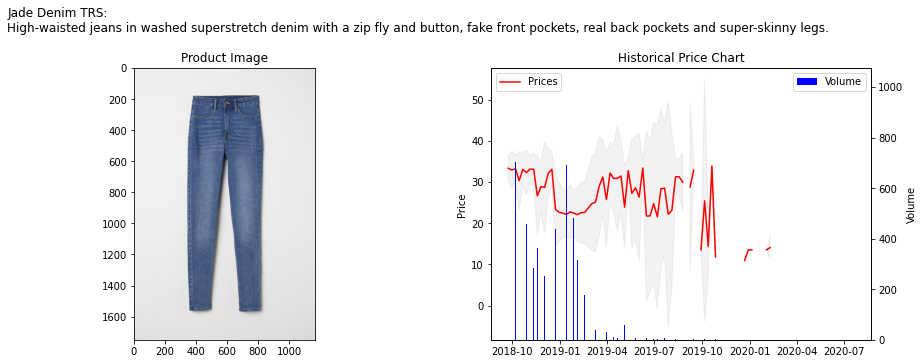

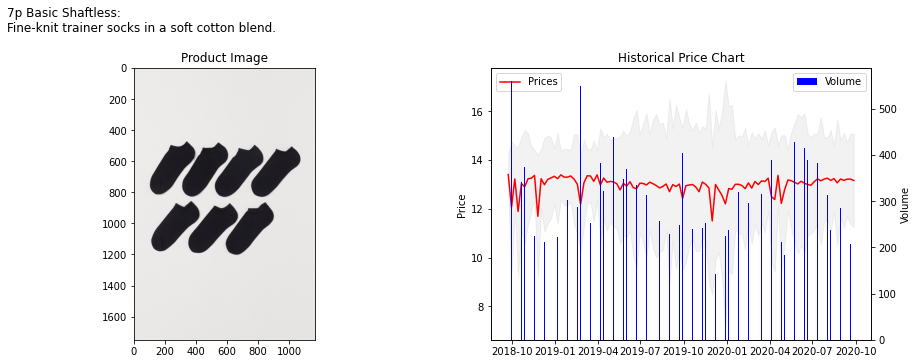

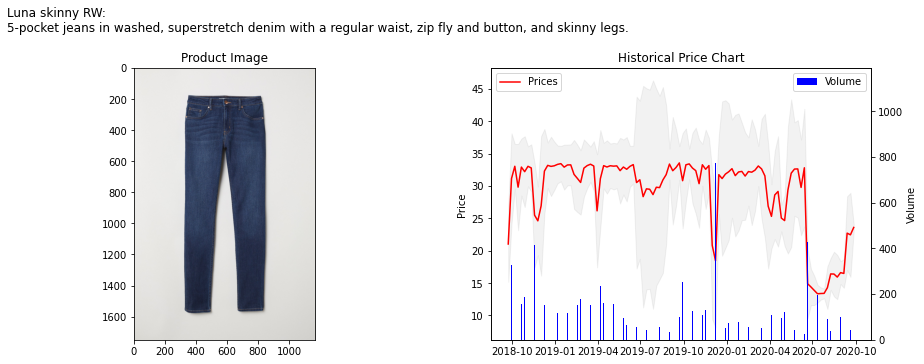

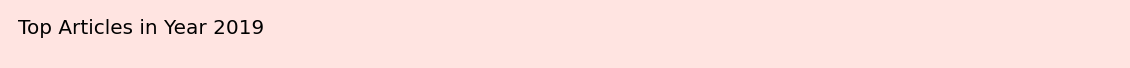

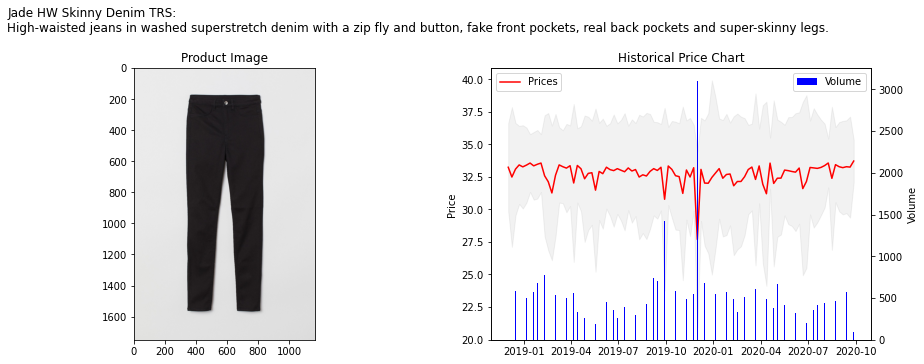

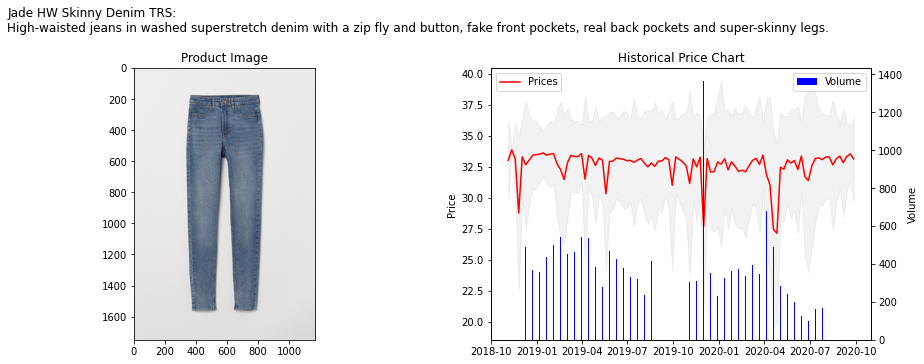

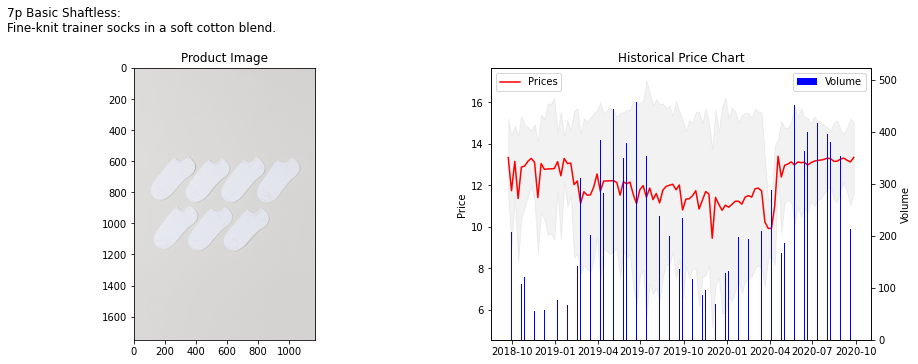

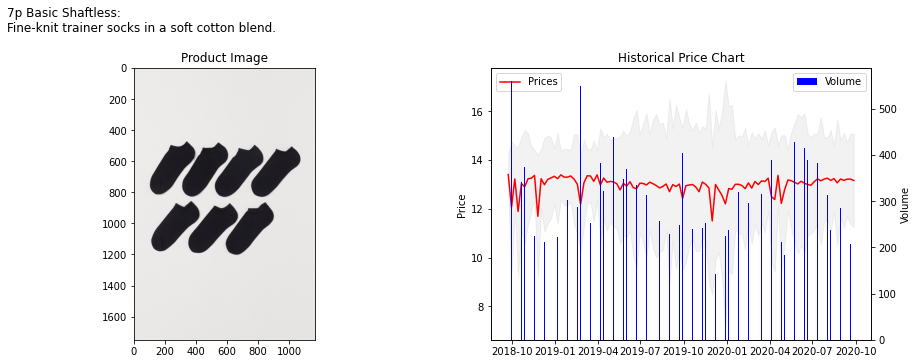

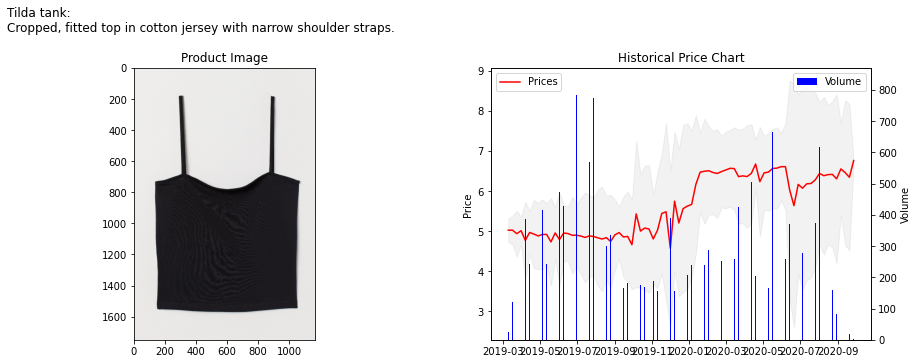

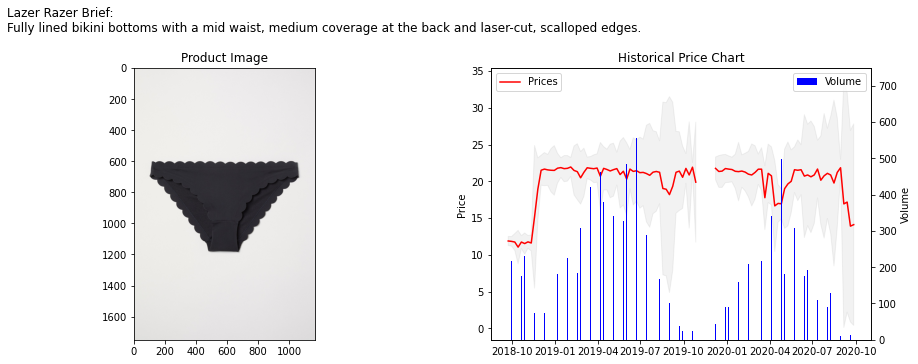

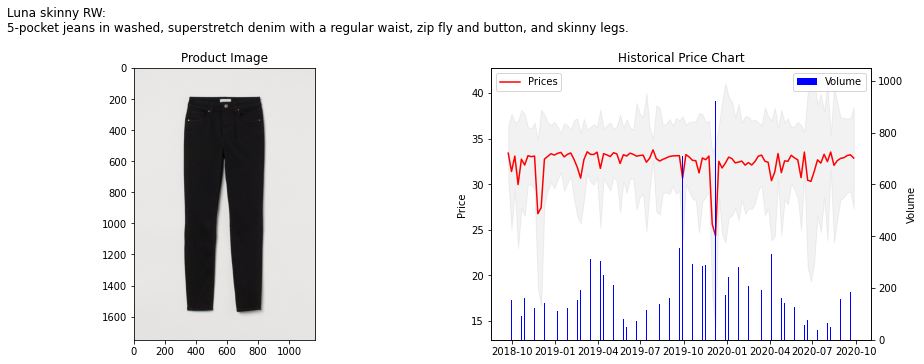

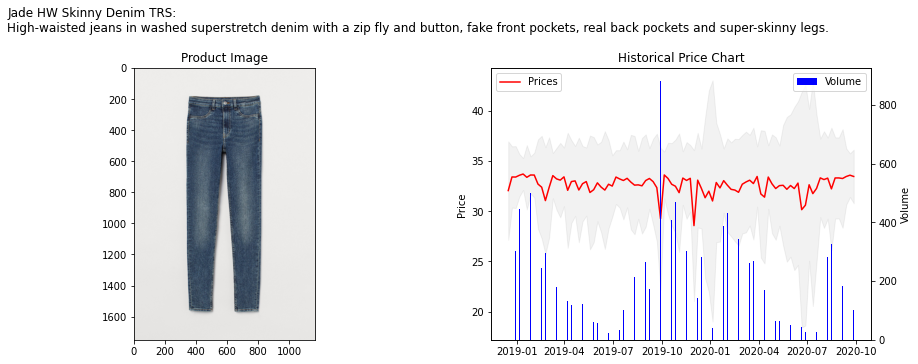

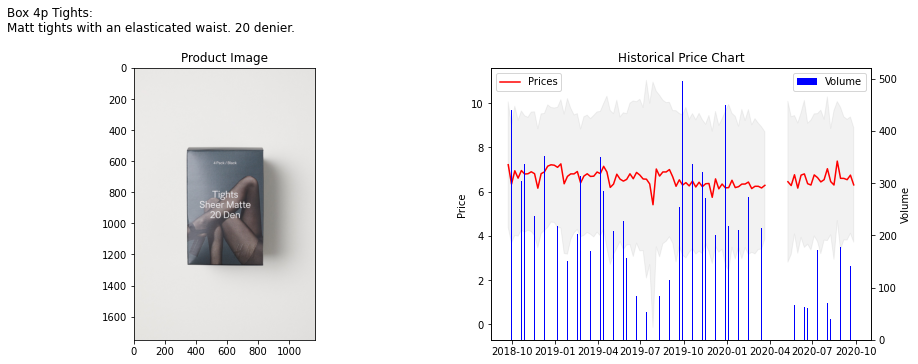

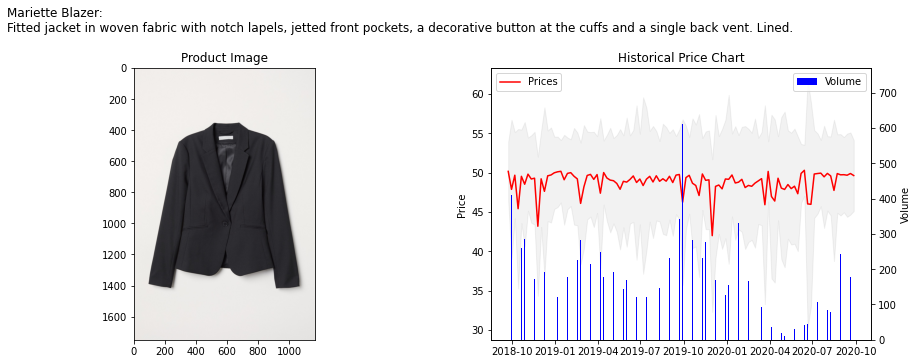

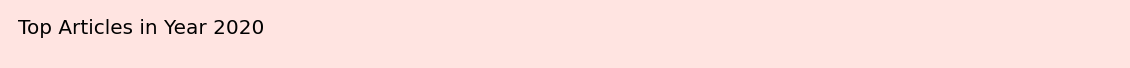

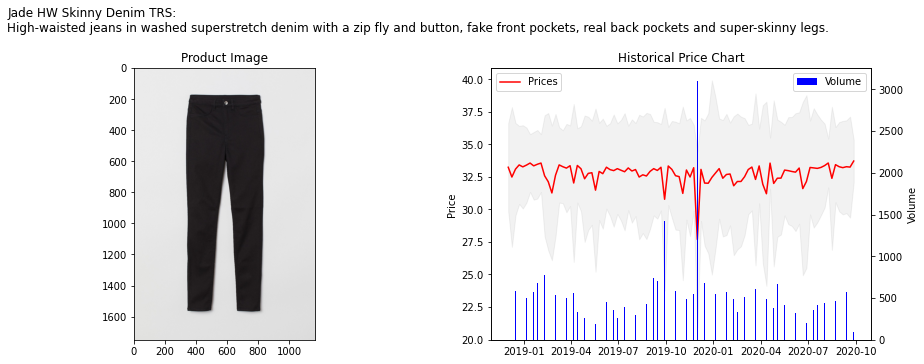

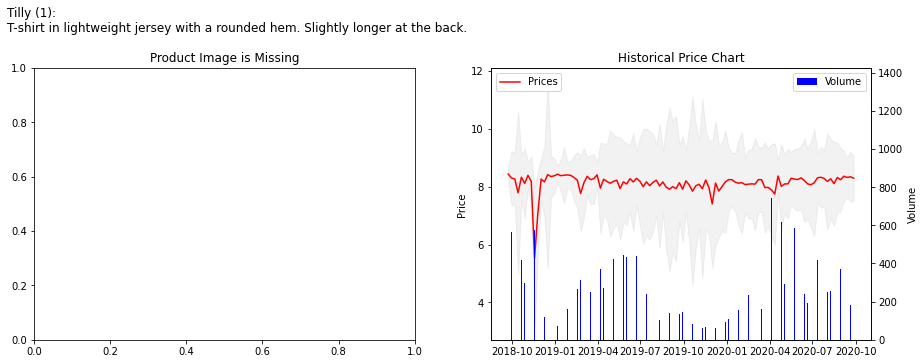

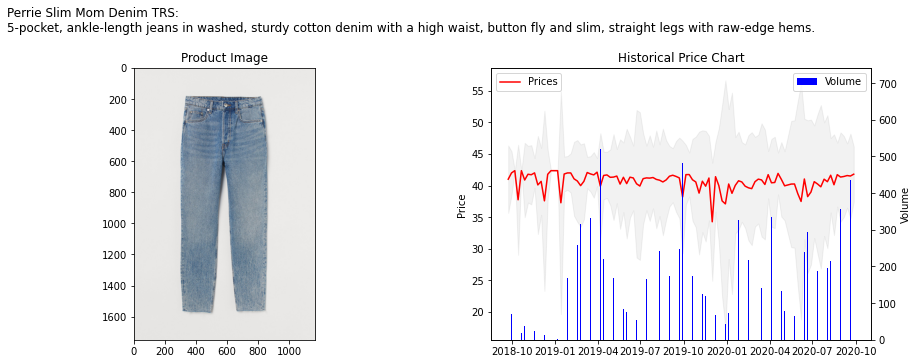

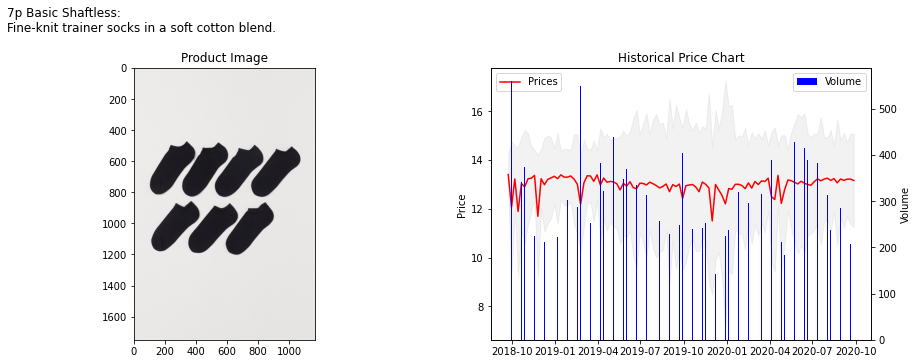

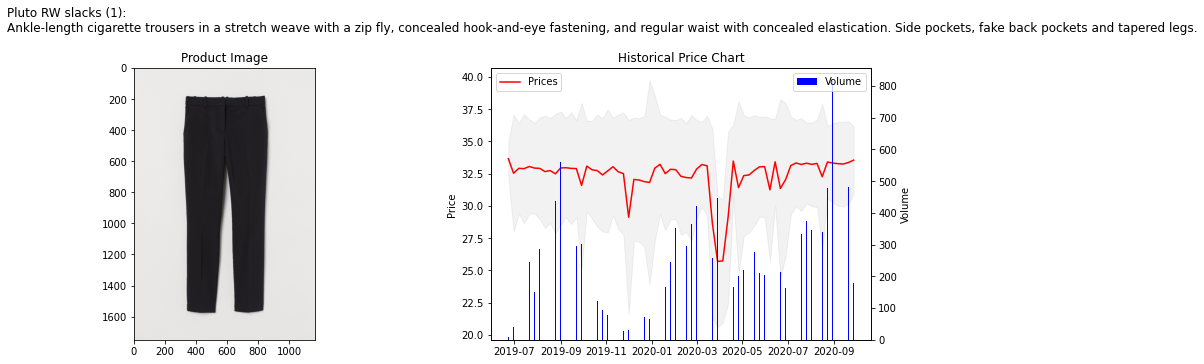

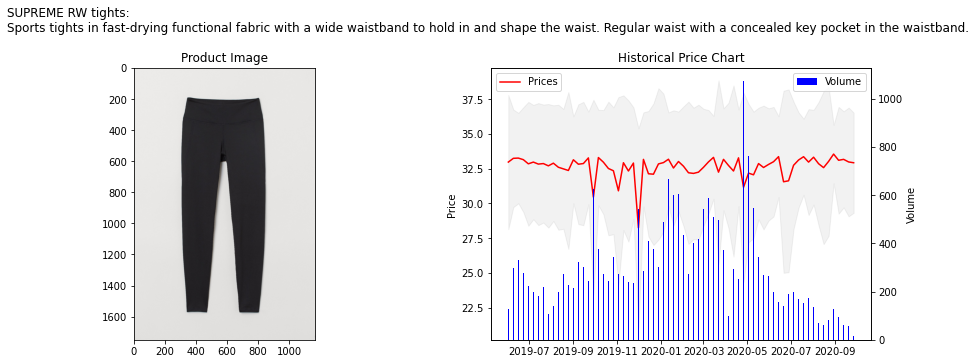

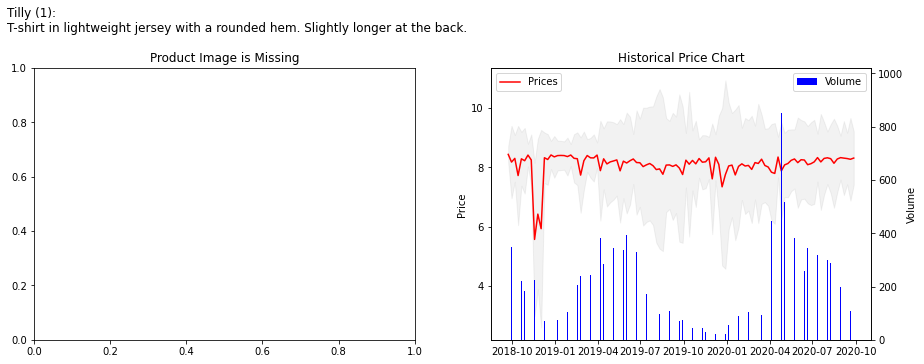

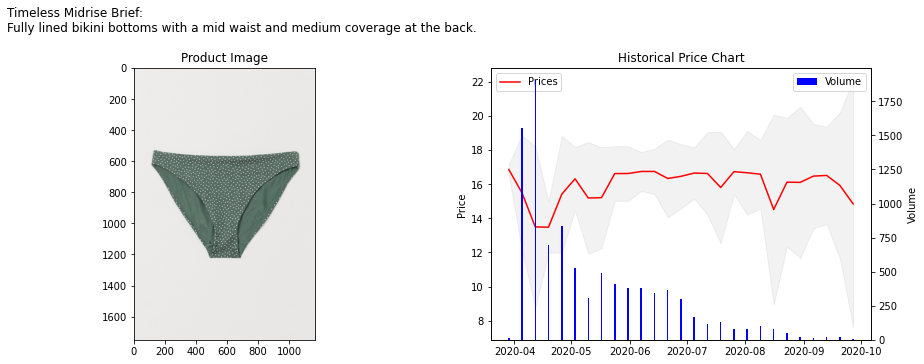

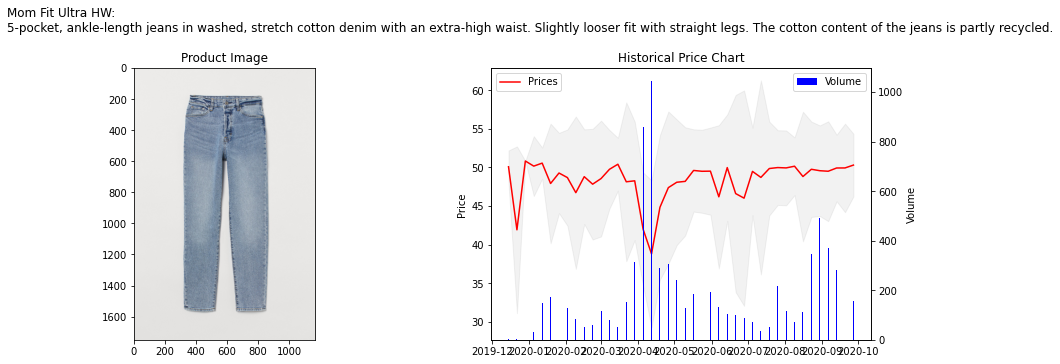

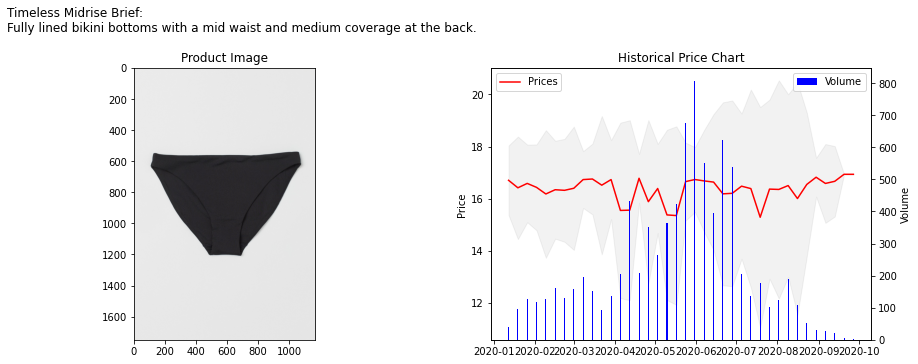

In [20]:
years = groupedTrx.year.unique()
for year in years:
    dfYear = groupedTrx[groupedTrx.year==year]
    dfYear = dfYear.sort_values(by='count',ascending=False)
    topArticleId = dfYear[:10].article_id.values    
    titleText = "Top Articles in Year {}".format(year)
    createDividerTitle(title=titleText,color='mistyrose')
    for article_id in topArticleId:
        visualizeRowArticle(article_id)

## Visualize top products for each Index category, based on 2020 Sales

In [21]:
transactionsSample.head()

t_dat                                        customer_id  \
28040372 2020-06-25  a493527d8d7ff096cf43bf8a973560a40eac514bd15854...   
10111039 2019-05-11  80da9867410a665fd524198ab59454278cc271ed0b79ee...   
17104844 2019-09-28  26cd9a2608102d3489ce567ae8dc22c8190f592be67ba1...   
15611061 2019-08-17  fb6abeffbd3aff80e099329d286693734ef2332aaeba2e...   
1202890  2018-10-15  875ef5a2a9f848eebd1dccb7a7c606a0738a4d73b7f458...   

          article_id     price  sales_channel_id  year  
28040372   836551001  0.008458                 1  2020  
10111039   721744007  0.024678                 2  2019  
17104844   733098009  0.013542                 2  2019  
15611061   740922001  0.025407                 1  2019  
1202890    578860001  0.010153                 2  2018

In [22]:
# Get top index name
article_volume2020 = transactionsSample[transactionsSample['year']==2020].groupby('article_id')['t_dat'].count().sort_values(ascending=False).reset_index()
article_volume2020.columns = ['article_id','volume']
articles_withVolume2020 = pd.merge(articles,article_volume2020,on=['article_id'],how='left')
dfTopIndex = articles_withVolume2020.groupby('index_name')['volume'].sum().sort_values(ascending=False)
dfTopIndex.head(10)

index_name
Ladieswear                        14015.0
Divided                            7553.0
Lingeries/Tights                   6761.0
Ladies Accessories                 1871.0
Menswear                           1845.0
Sport                              1589.0
Children Sizes 134-170              235.0
Baby Sizes 50-98                    227.0
Children Sizes 92-140               151.0
Children Accessories, Swimwear       70.0
Name: volume, dtype: float64

In [23]:
index = 'Menswear'
dfTopArticleID = articles_withVolume2020[articles_withVolume2020.index_name==index].sort_values(by='volume',ascending=False)
listTopArticleID = dfTopArticleID.head(5)['article_id'].values
listTopArticleID

array([685816001, 685816002, 685813001, 598755002, 685814005])

In [24]:
index = 'Ladieswear'
dfTopArticleID = articles_withVolume2020[articles_withVolume2020.index_name==index].sort_values(by='volume',ascending=False)
listTopArticleID = dfTopArticleID.head(5)['article_id'].values
listTopArticleID

array([610776002, 751471001, 610776001, 841383002, 800691008])

In [25]:
articles_withVolume2020.index_name.unique()

array(['Ladieswear', 'Lingeries/Tights', 'Baby Sizes 50-98', 'Menswear',
       'Ladies Accessories', 'Sport', 'Children Sizes 92-140', 'Divided',
       'Children Sizes 134-170', 'Children Accessories, Swimwear'],
      dtype=object)

In [26]:
colorIndex = {}
for index in articles_withVolume2020.index_name.unique():
    colorIndex[index] = 'lightgrey'
colorIndex['Ladieswear'] = 'lightcoral'
colorIndex['Ladies ACcessories'] = 'lightcoral'
colorIndex['Menswear'] = 'lightskyblue'
colorIndex['Lingeries/Tights'] = 'purple'

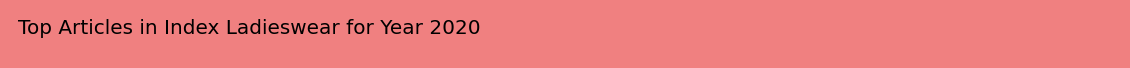

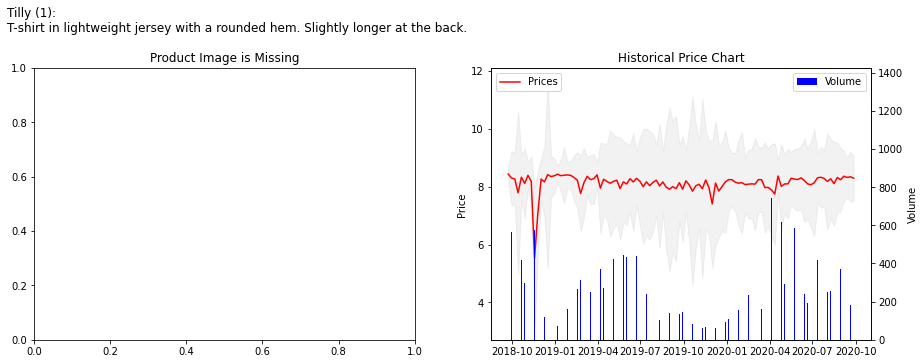

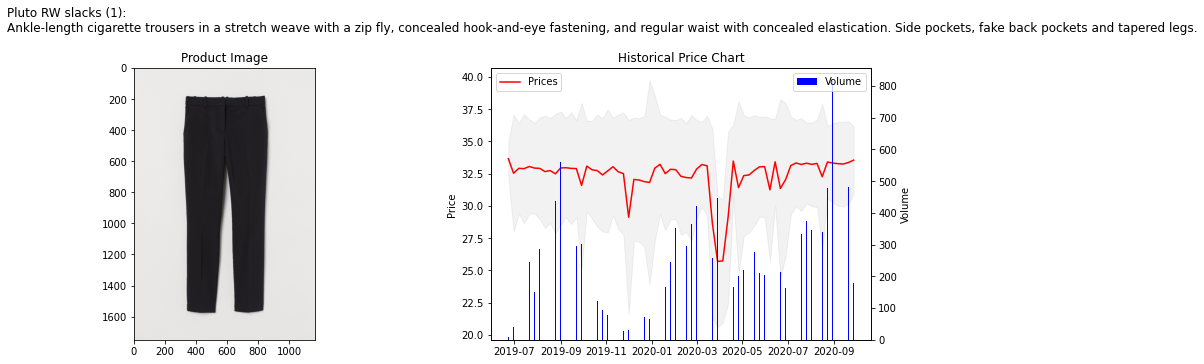

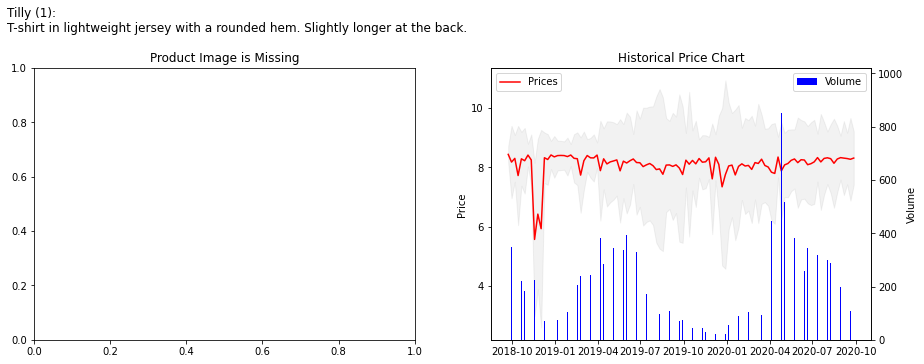

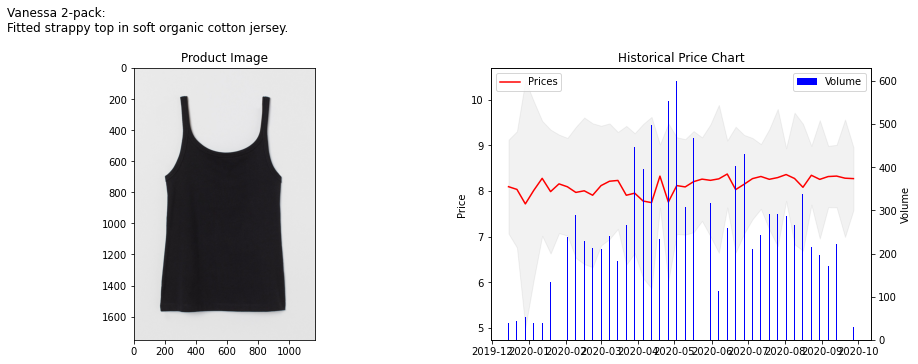

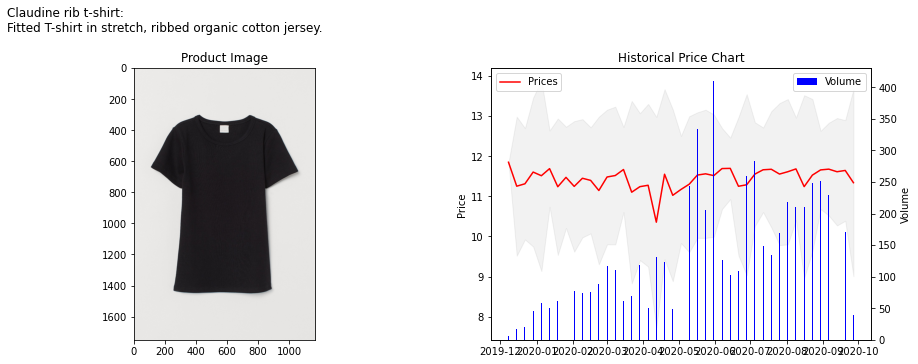

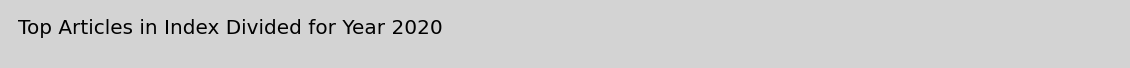

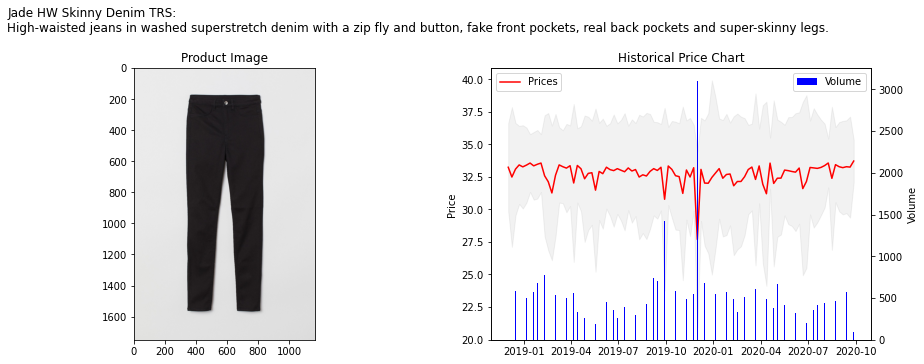

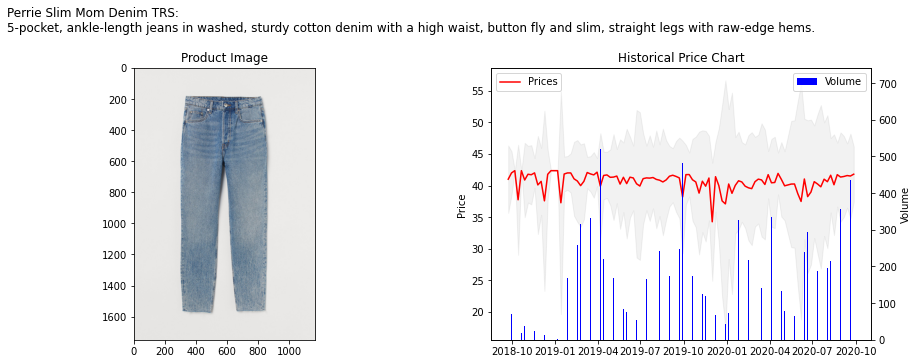

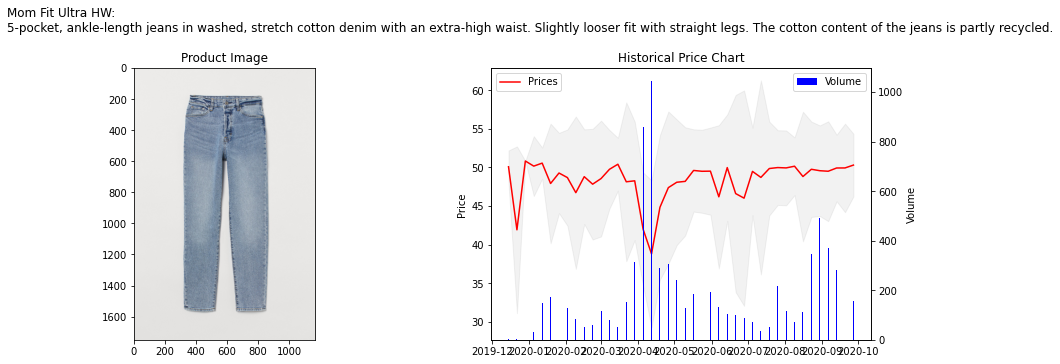

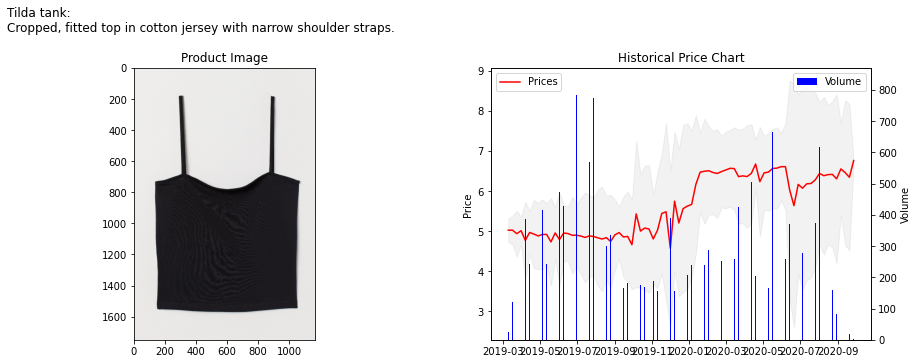

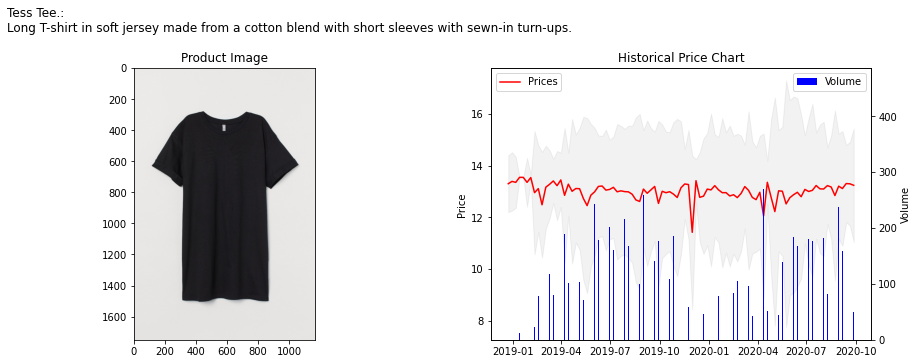

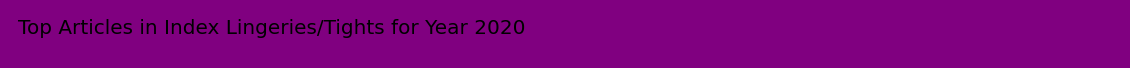

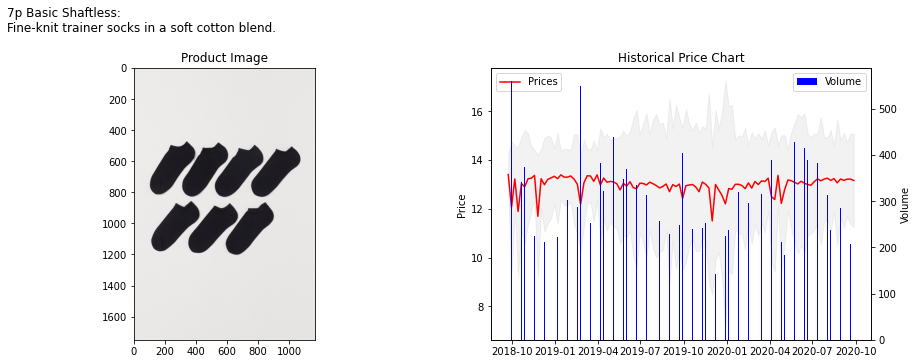

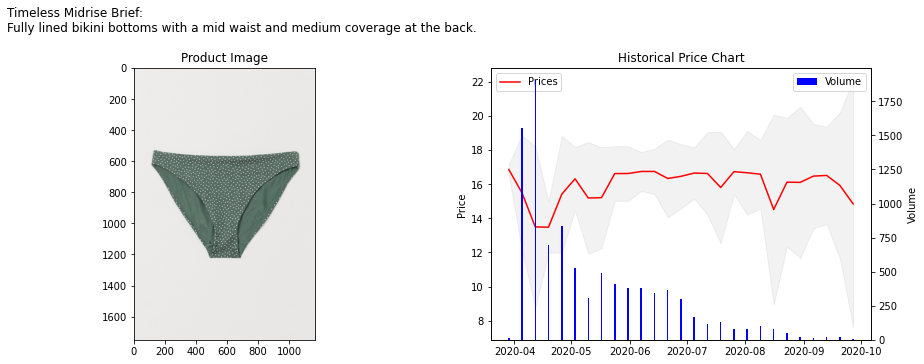

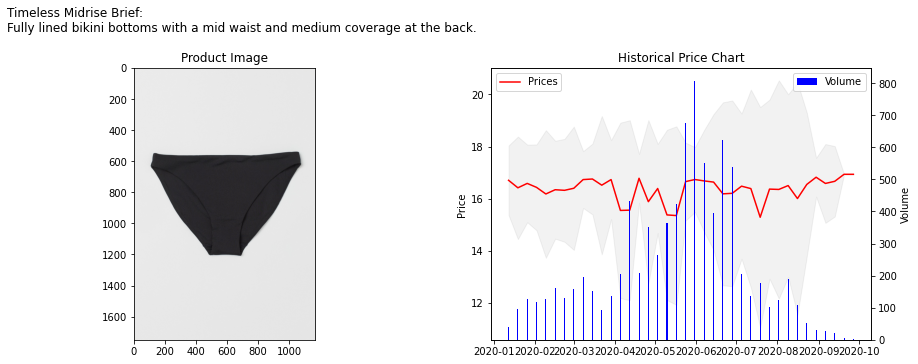

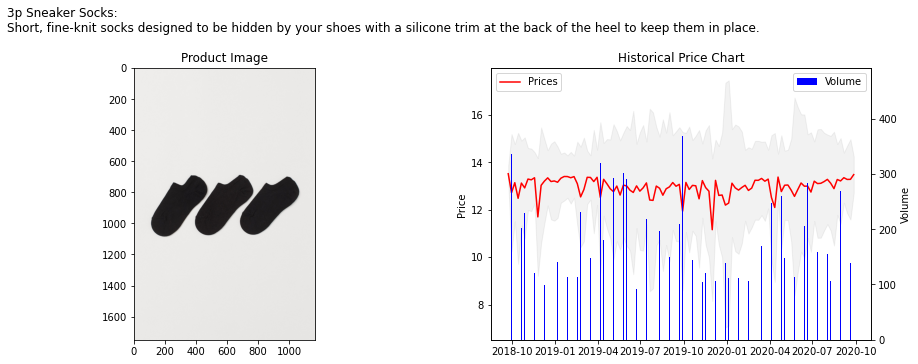

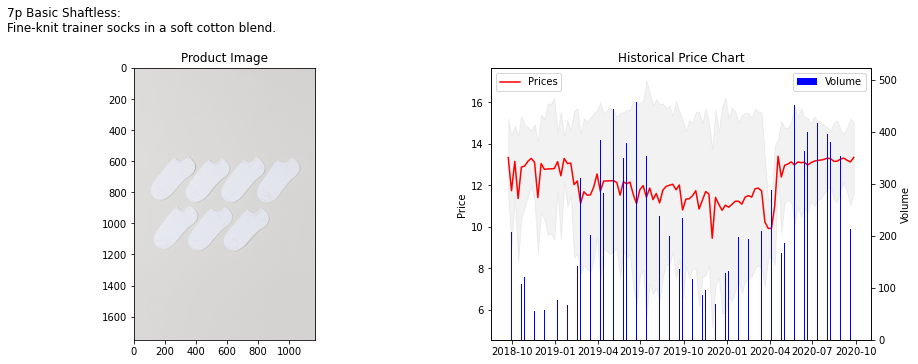

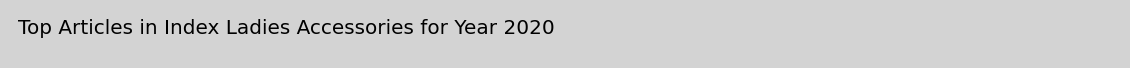

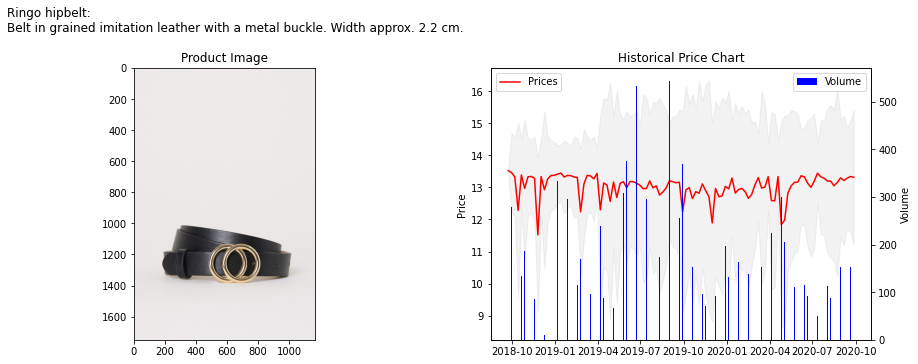

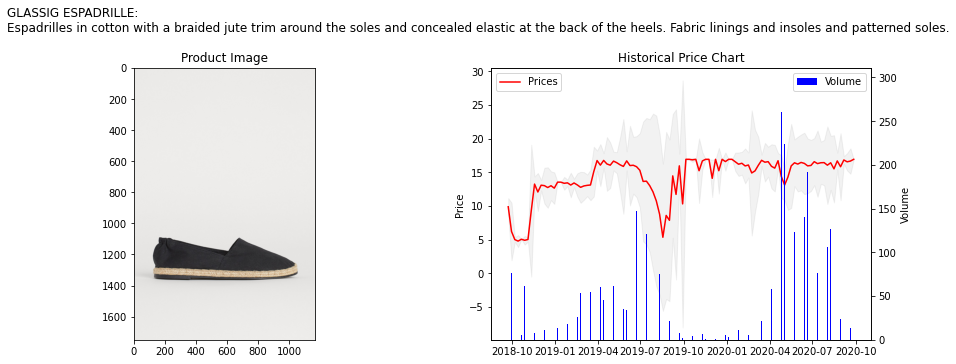

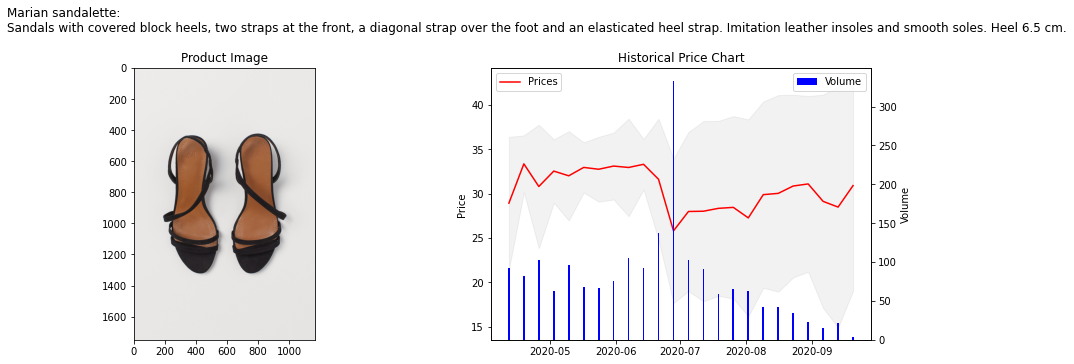

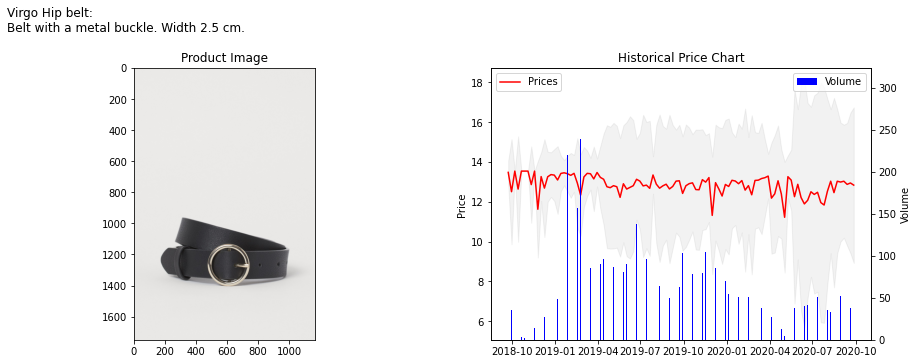

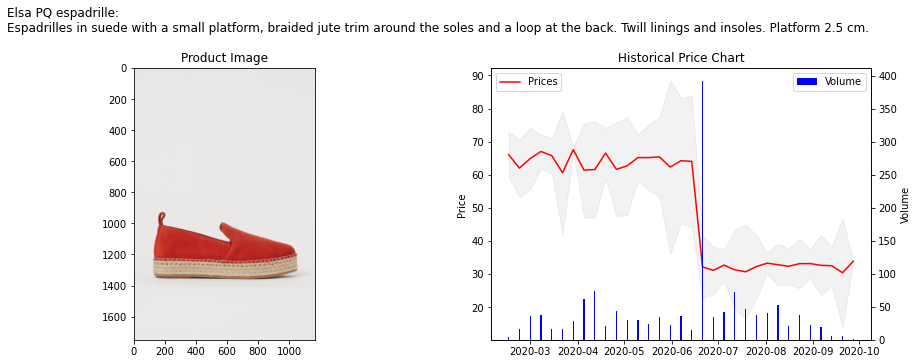

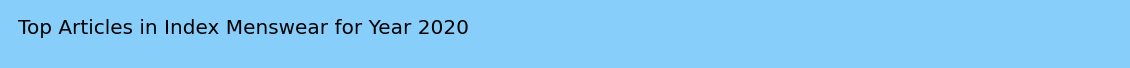

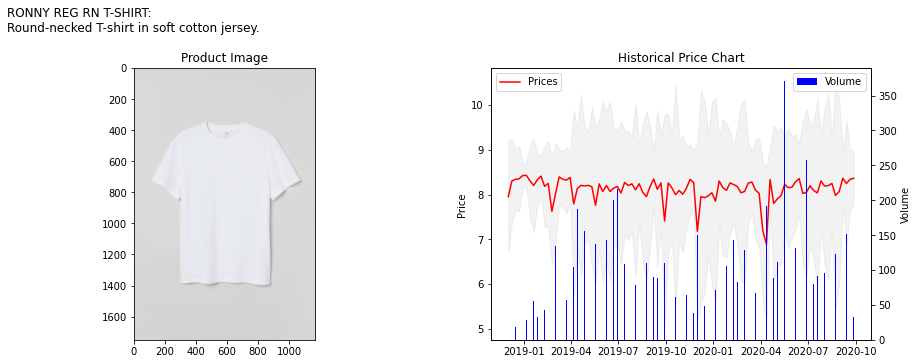

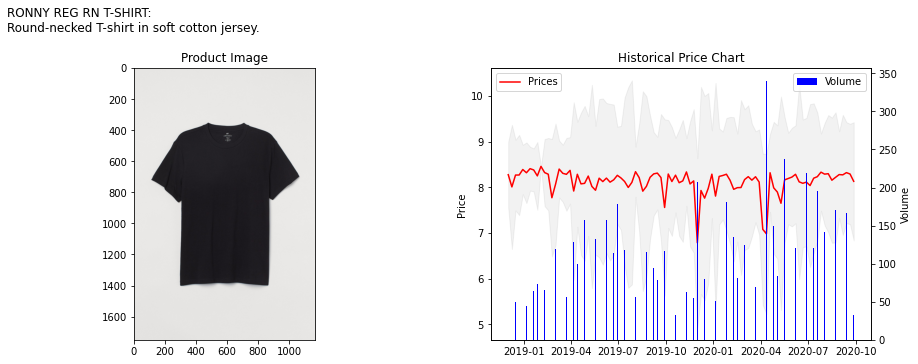

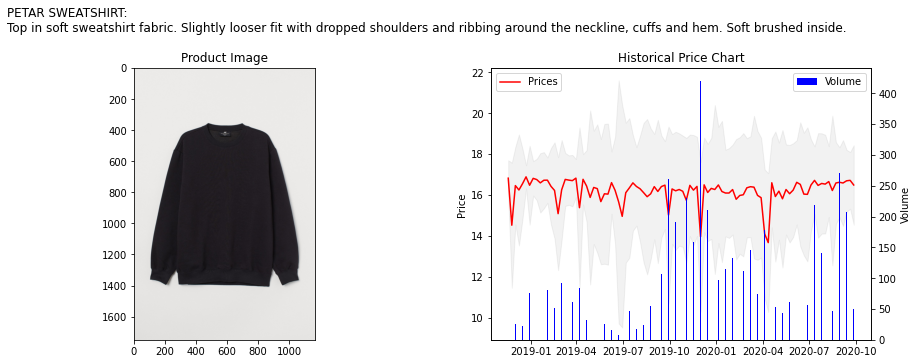

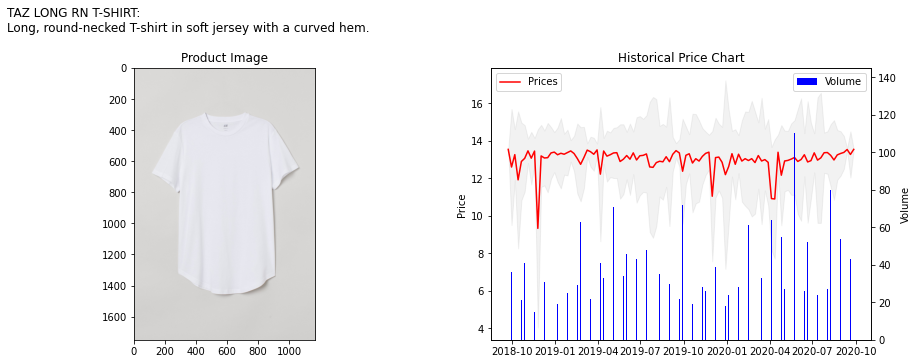

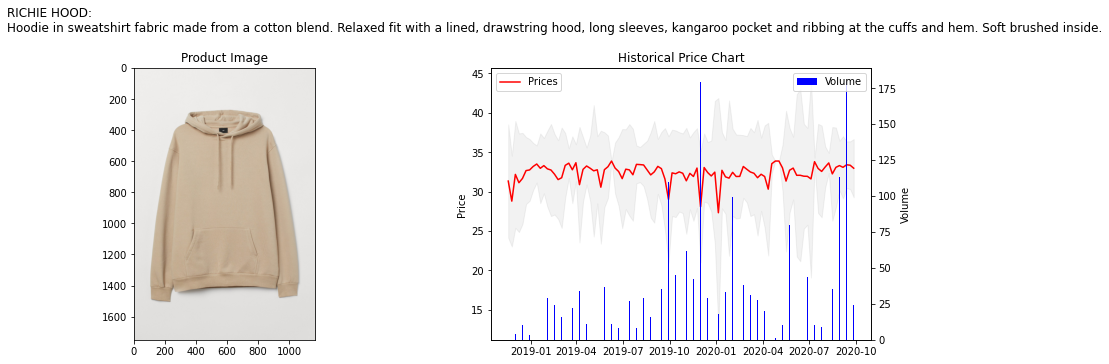

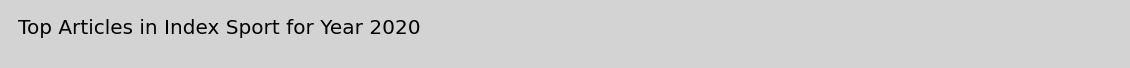

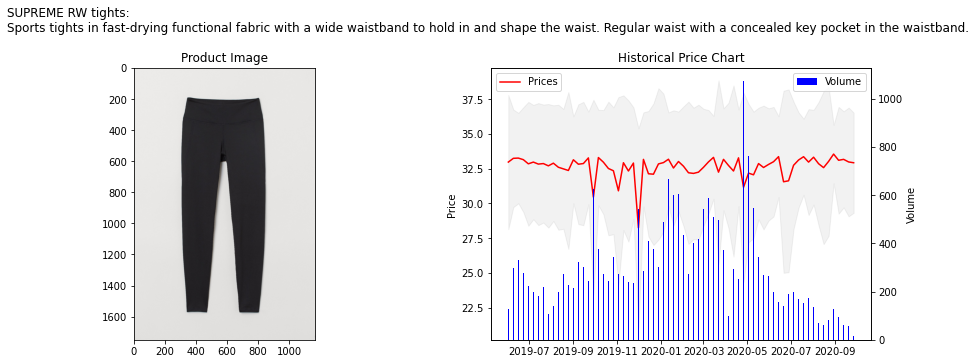

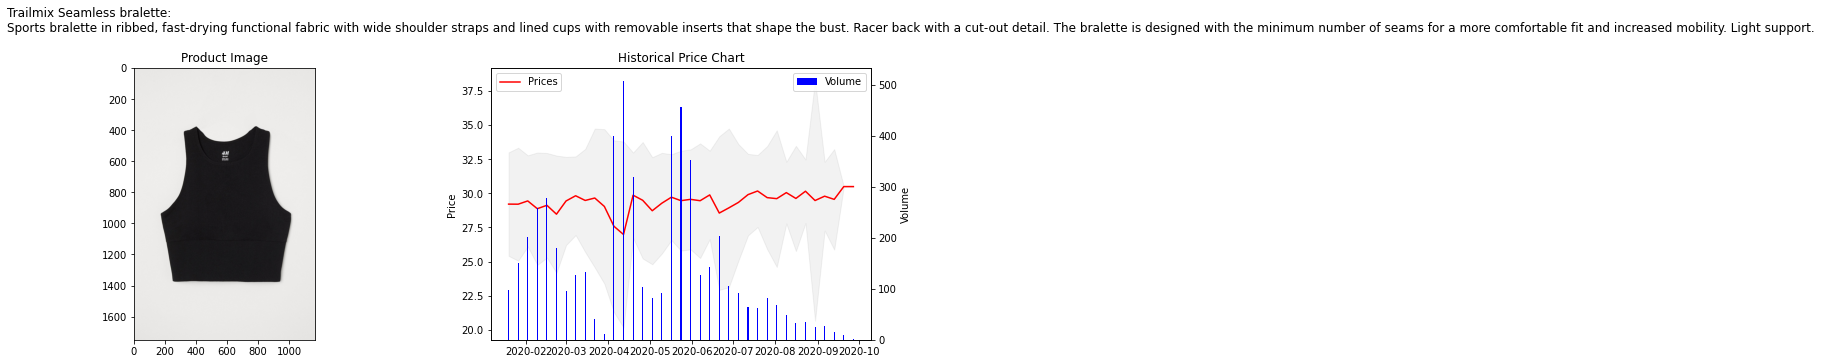

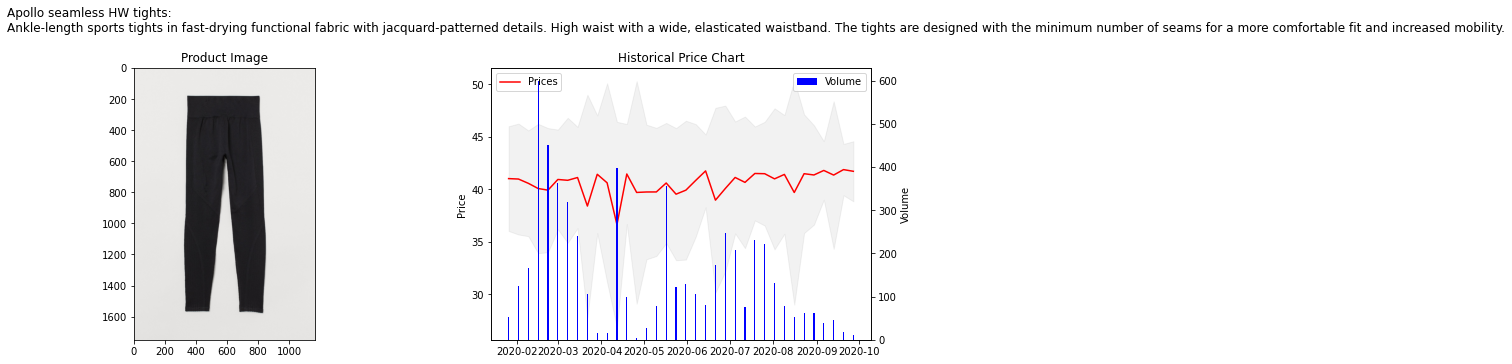

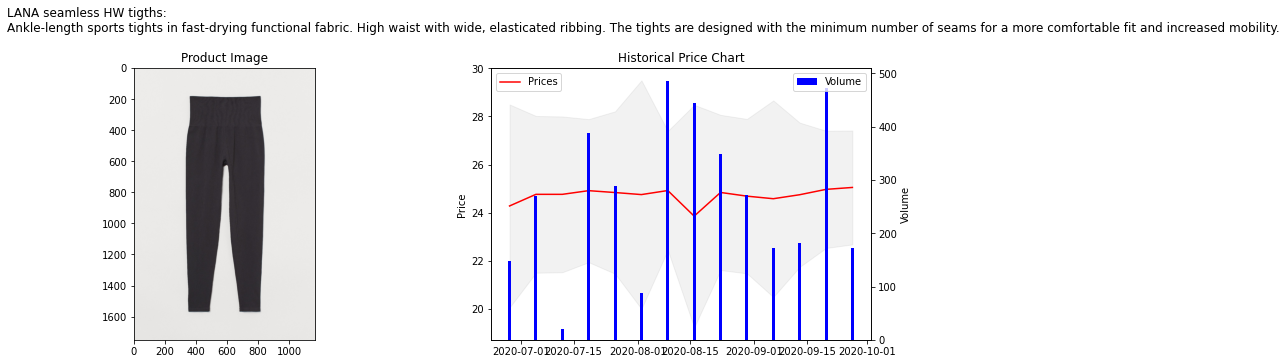

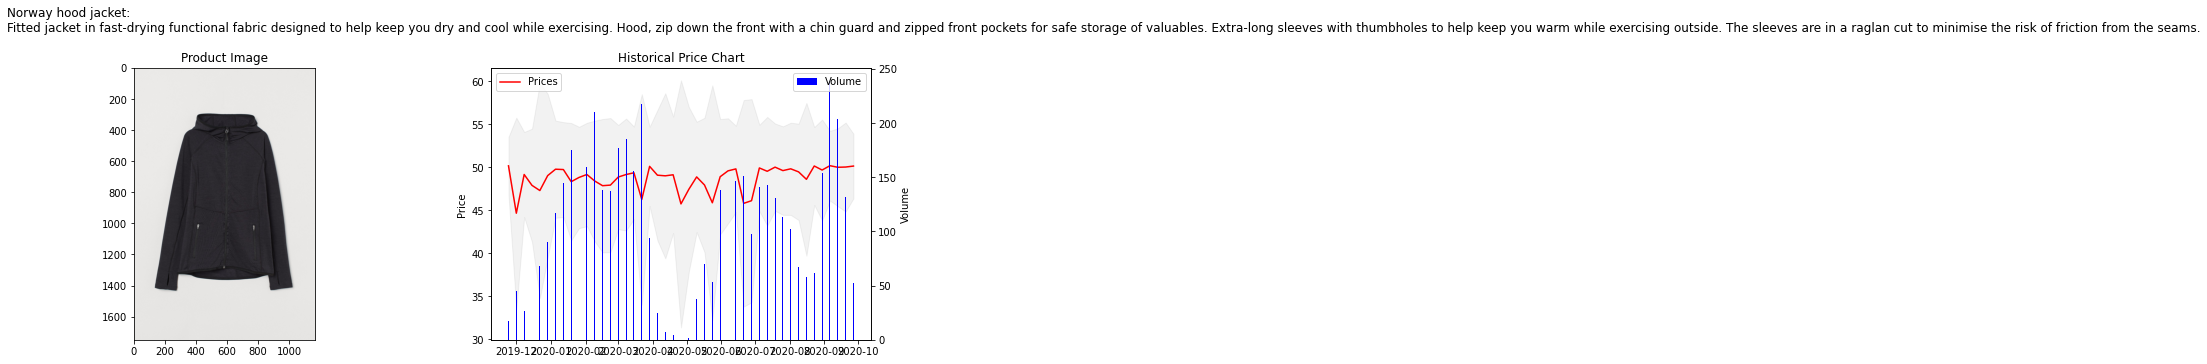

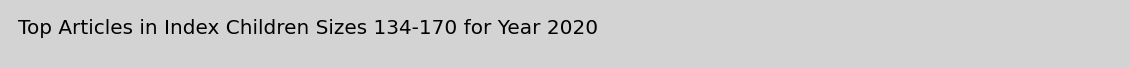

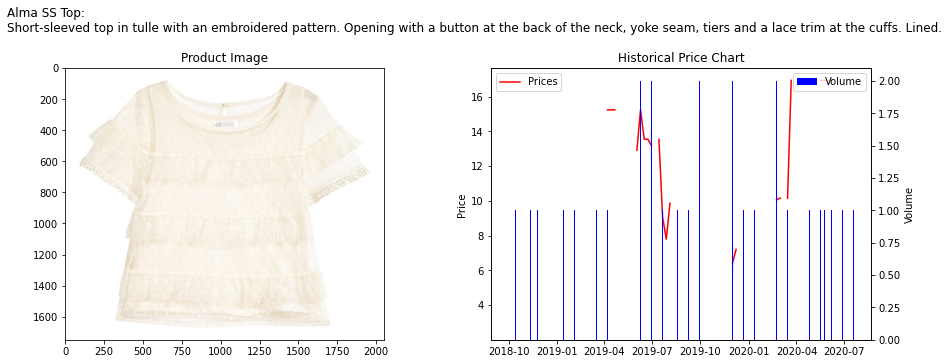

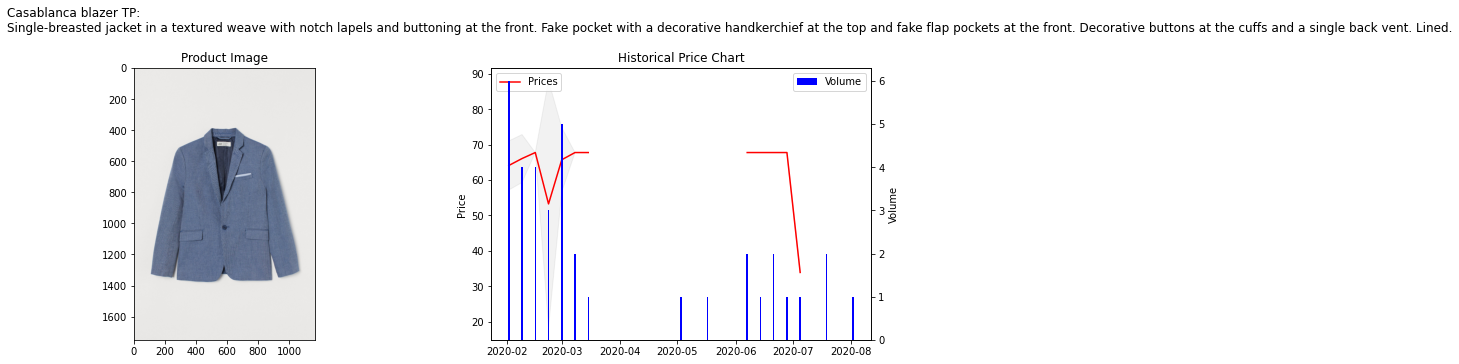

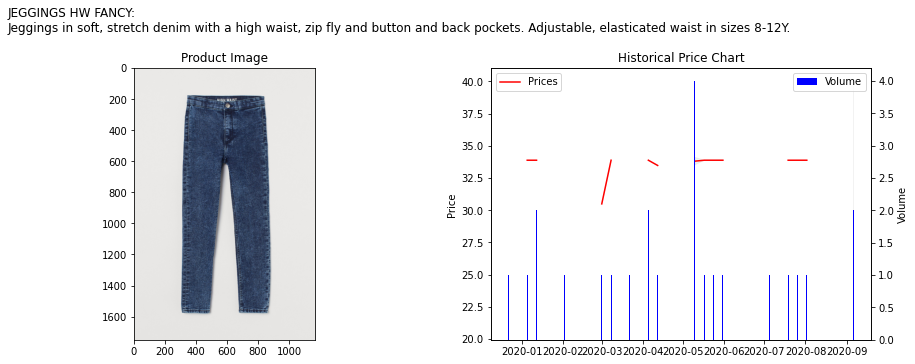

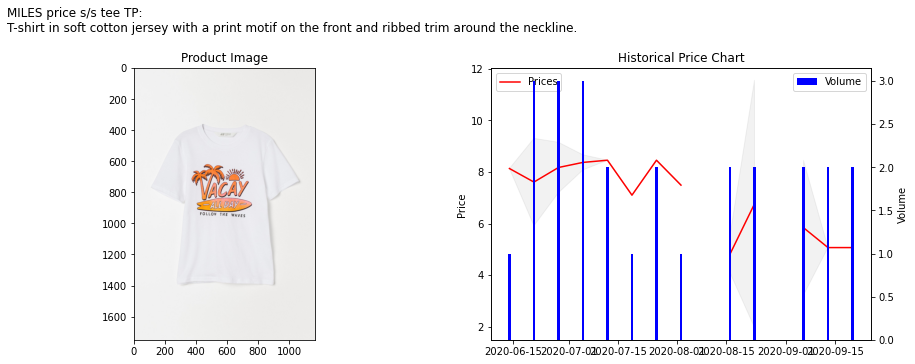

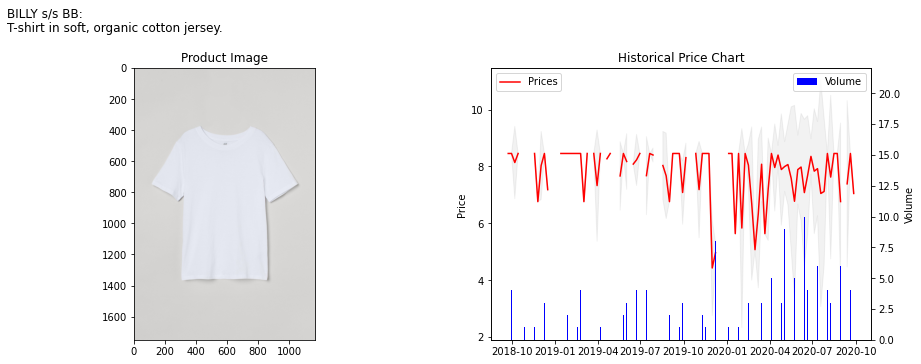

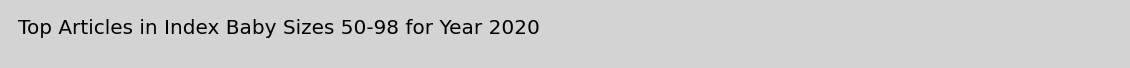

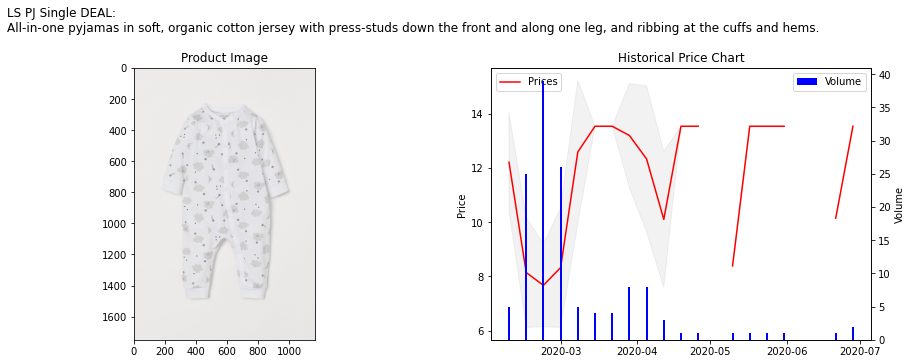

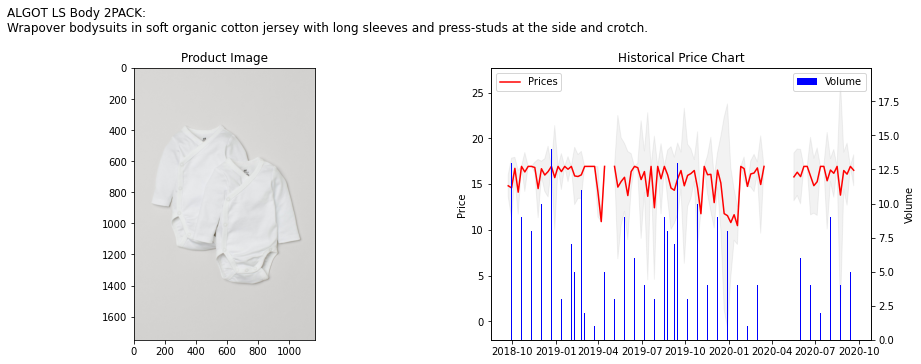

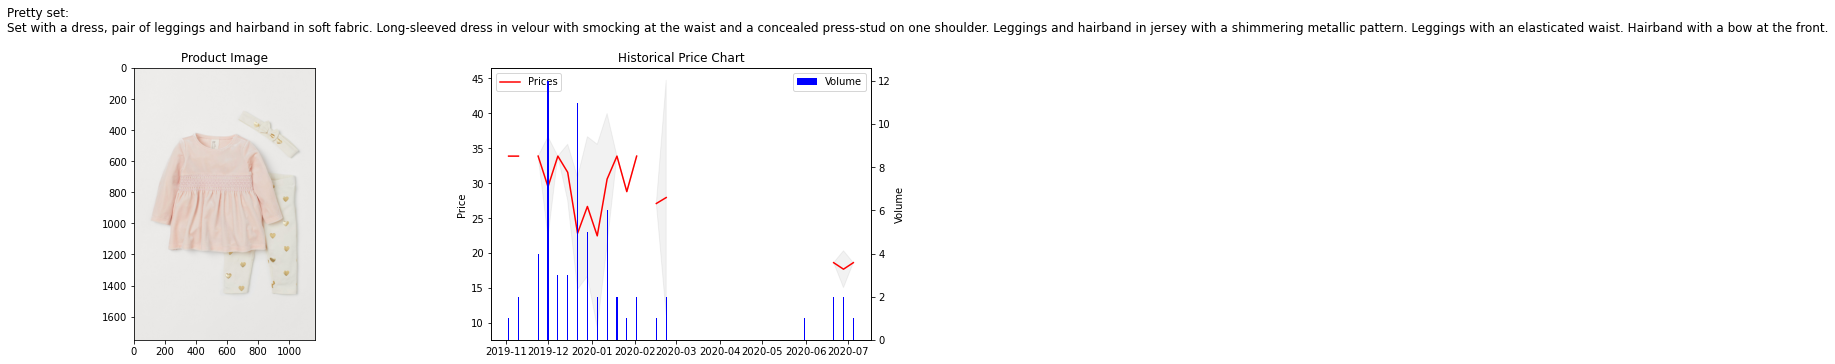

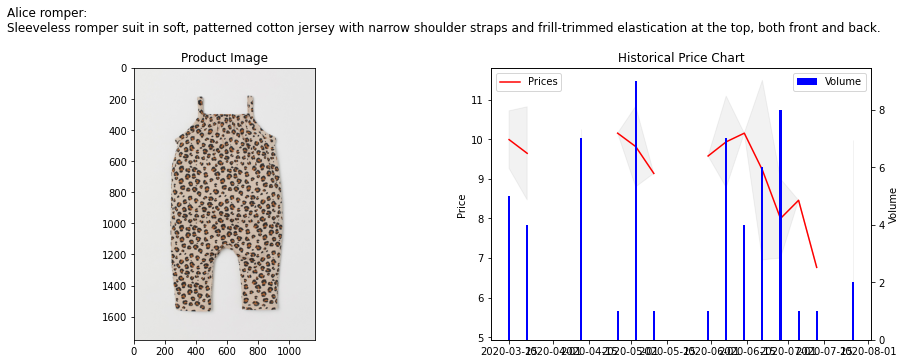

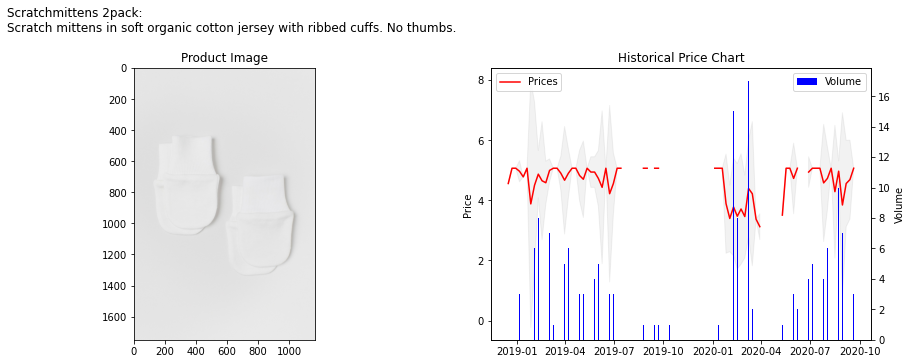

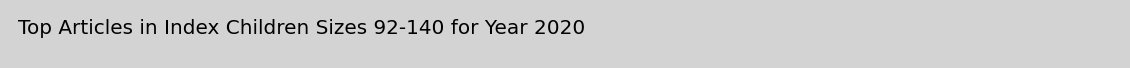

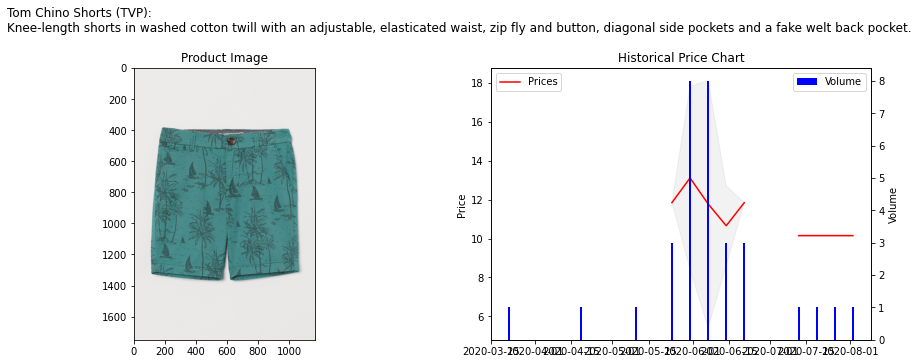

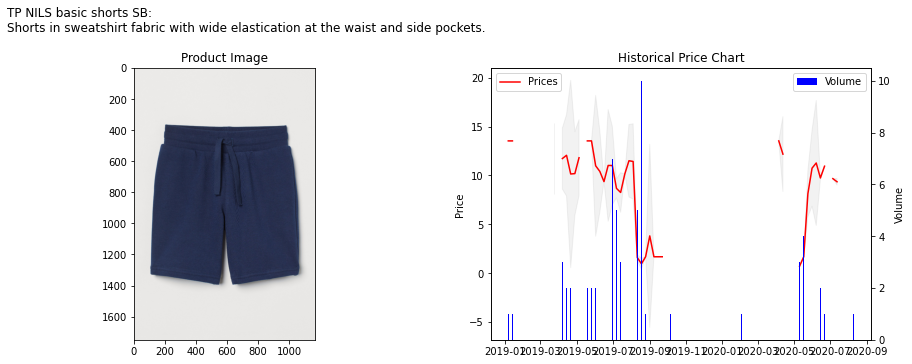

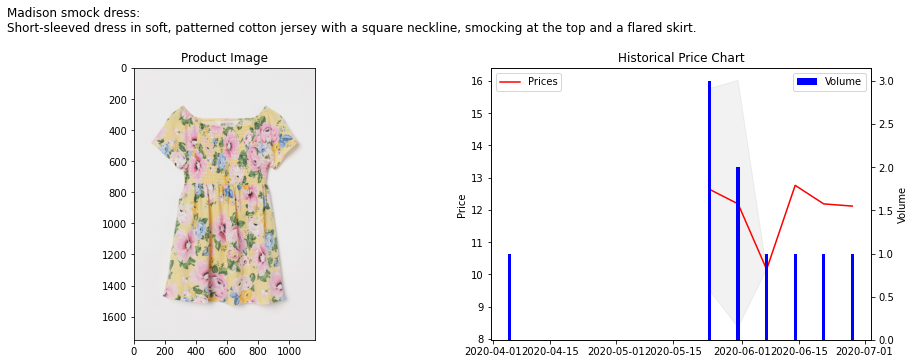

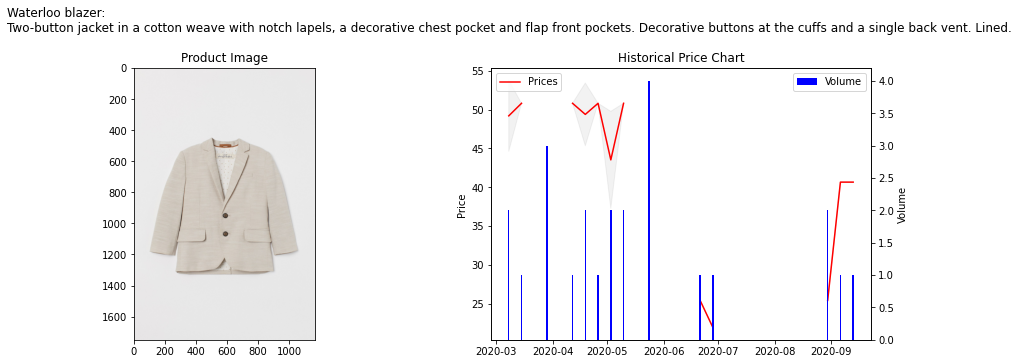

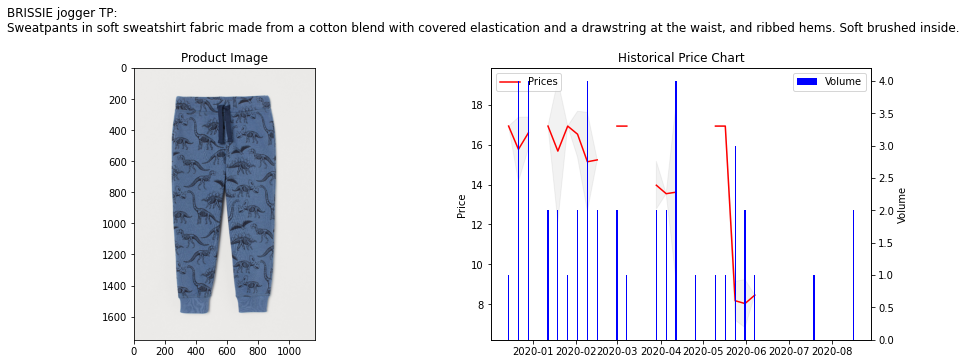

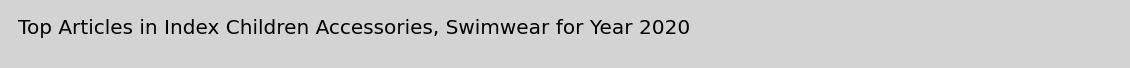

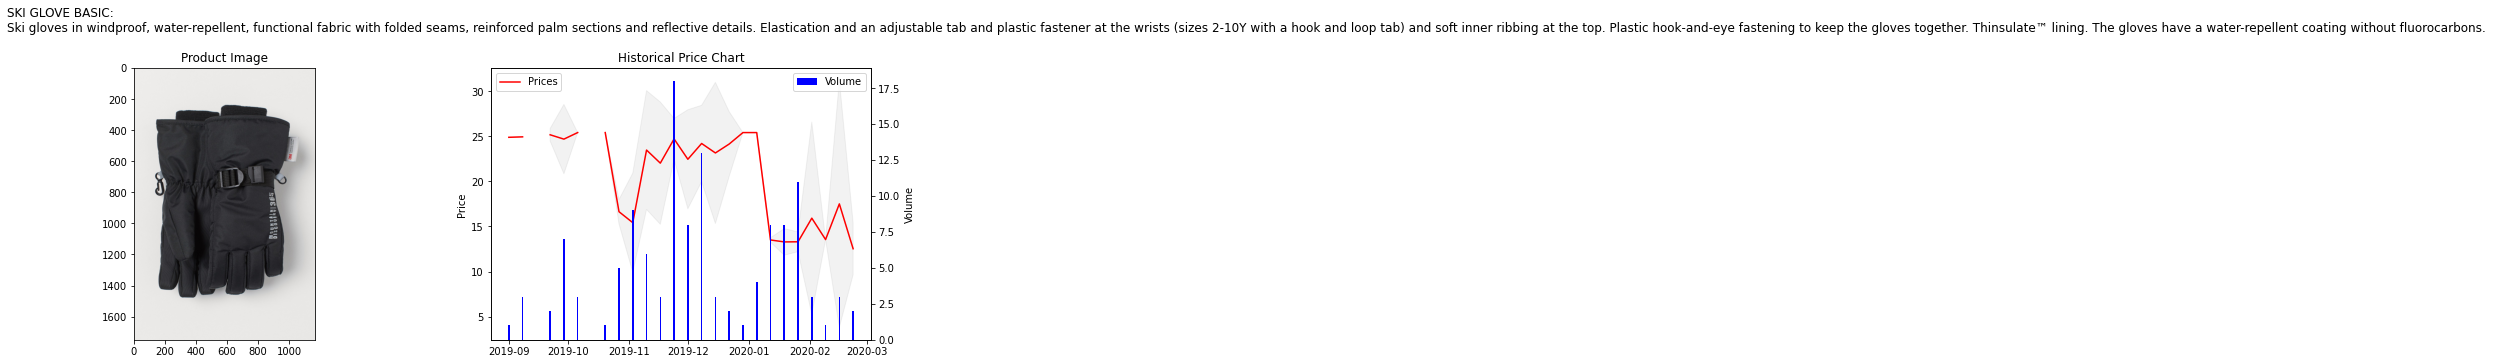

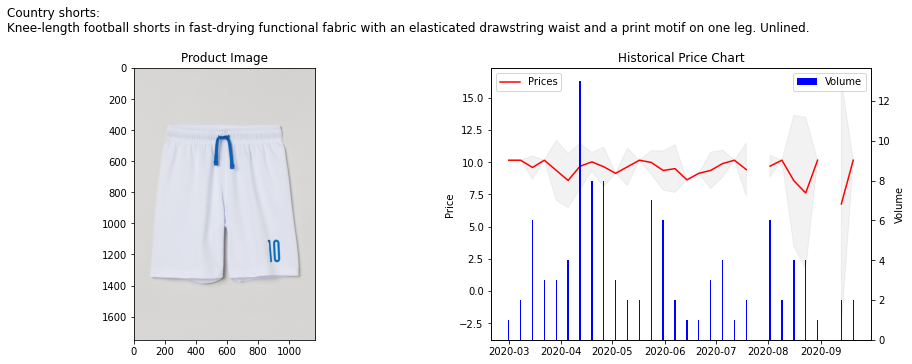

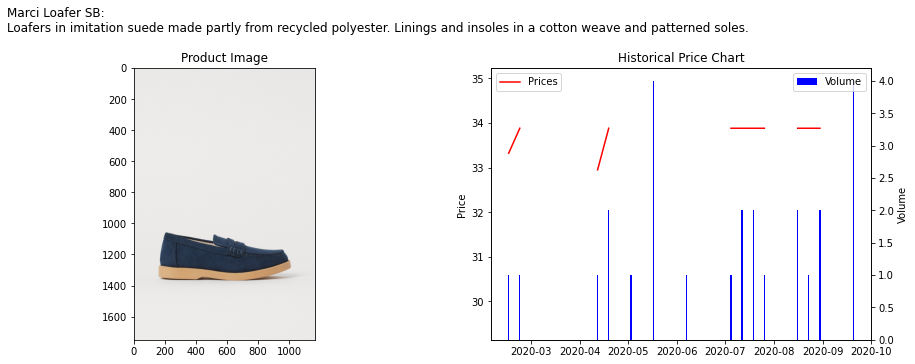

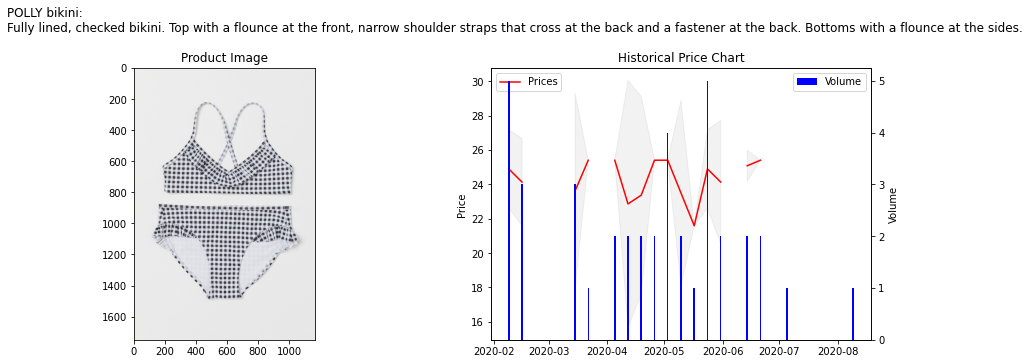

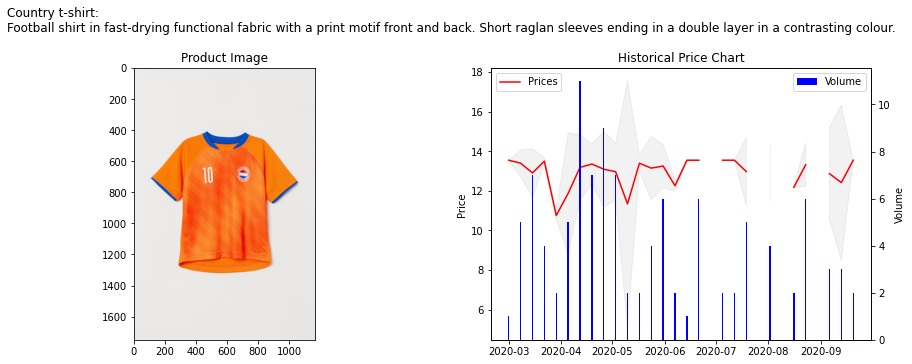

In [27]:
for index in dfTopIndex.head(10).index:
    dfTopArticleID = articles_withVolume2020[articles_withVolume2020.index_name==index].sort_values(by='volume',ascending=False)
    listTopArticleID = dfTopArticleID.head(5)['article_id'].values
    titleText = "Top Articles in Index {} for Year 2020".format(index)
    createDividerTitle(title=titleText,color=colorIndex[index])
    for article_id in listTopArticleID:
        visualizeRowArticle(article_id)       